# Identify tissue specific markers

In [7]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")


BiocManager::install("SummarizedExperiment")

suppressPackageStartupMessages(library(SummarizedExperiment))
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(DESeq2))
library(RColorBrewer)
require(plyr)

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.r-project.org


Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.2 Patched (2022-01-24
  r81578)

Warning message:
“package(s) not installed when version(s) same as current; use `force = TRUE` to
  re-install: 'SummarizedExperiment'”
Old packages: 'blob', 'limma', 'lme4', 'polynom', 'rbibutils', 'RcppEigen',
  'reshape', 'segmented'

Warning message:
“package ‘S4Vectors’ was built under R version 4.1.3”
Loading required package: plyr

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following objects are masked f

In [8]:
source('../prj_helpers.R')

In [340]:
# load pre-qc'ed data
se.qc <- readRDS('../03-sample_qc/se.qc.experimental.rds')

In [700]:
unique(se.qc@colData[,"full.tissue"])

[1] Spleen              Kidney              Liver              
 [4] Brain:Brain-Gr      Sex Organ:Ovary     Lymph node:LN-AX-R 
 [7] Lymph node:LN-ING-L Lymph node:LN-MES   Sex Organ:Sex-Organ
[10] Skin:Rash           Skin:Non-Rash       Adrenal Gland      
[13] Sex Organ:Testis    Lung                Brain:Brain-Wh     
[16] Whole blood         PBMC                Lymph node:NA      
[19] SpinalCord         
19 Levels: Adrenal Gland Brain:Brain-Gr Brain:Brain-Wh Kidney Liver ... Whole blood

In [564]:
rownames(se.qc.experimental)[rowData(se.qc.experimental)$viralGene]

character(0)

In [344]:
# Select experimental samples from early timepoints except blood ones
se.qc$dpi_time[se.qc$dpi_time < 0]=0
se.qc$dpi_time_factor= as.character(se.qc$dpi_time_factor)
se.qc$dpi_time_factor[se.qc$dpi_time_factor < 0]="<0"
se.qc.experimental <- se.qc[,se.qc$SampleType == 'Experimental'  &
                               se.qc$dpi_time <= 4 ]
unique(se.qc.experimental$dpi_time_factor)

[1] "4"  "3"  "0"  "<0" "1"  "2"

In [345]:
# Select experimental samples from all tps except blood ones
se.qc.experimental.alltp <- se.qc[,se.qc$SampleType == 'Experimental'  & 
                                  !(se.qc$dpi_time_factor %in% c(1,2)) ]

#se.qc.experimental.alltp <- se.qc[,se.qc$SampleType == 'Experimental'  &
#                            !(se.qc$tissue %in% c('Whole blood','PBMC')) & 
#                                  !(se.qc$dpi_time_factor %in% c(1,2)) ]

In [561]:
# remove viral genes
se.qc.experimental <- se.qc.experimental[!rowData(se.qc.experimental)$viralGene,]

In [347]:
colnames(colData(se.qc.experimental))
colData(se.qc.experimental)$full.tissue
se.qc.experimental@colData[,"full.tissue"]<-droplevels(se.qc.experimental@colData[,"full.tissue"])

[1] "file_identifiers"              "A.identifier"                 
 [3] "biosample"                     "batch.extraction"             
 [5] "irf.study.id"                  "id.cohort"                    
 [7] "id.individual"                 "tissue"                       
 [9] "data.received"                 "dn.rna"                       
[11] "date.broad.extract"            "quant.18s"                    
[13] "quant.18s.sd"                  "quant.kulesh"                 
[15] "quant.kulesh.sd"               "rin.e"                        
[17] "rna.conc.ng.uL"                "lib.conc.pmolar"              
[19] "xgen.index"                    "Assigned"                     
[21] "Unassigned_Unmapped"           "Unassigned_Read_Type"         
[23] "Unassigned_Singleton"          "Unassigned_MappingQuality"    
[25] "Unassigned_Chimera"            "Unassigned_FragmentLength"    
[27] "Unassigned_Duplicate"          "Unassigned_MultiMapping"      
[29] "Unassigned_Secondary"          "Unassigned_NonSplit"          
[31] "Unassigned_NoFeatures"         "Unassigned_Overlapping_Length"
[33] "Unassigned_Ambiguity"          "sub.tissue"                   
[35] "SampleType"                    "study.group"                  
[37] "challenge.group"               "animal.number"                
[39] "animal.tatoo"                  "sex"                          
[41] "weight"                        "birth.date"                   
[43] "viralReadCount"                "hostReadCount"                
[45] "pc.viral.reads"                "cohort.uncertain"             
[47] "cohort.numeric"                "totalReadCount"               
[49] "totalUnassigned"               "chrY_count"                   
[51] "chrX_count"                    "total_count"                  
[53] "Xist"                          "sex.1"                        
[55] "pc_Y"                          "pc_X"                         
[57] "Y_X_ratio"                     "sex_pred"                     
[59] "pred_recorded_sex_mismatch"    "dpi_time"                     
[61] "dpi_time_factor"               "xist_counts"                  
[63] "predicted_sex"                 "pred_rec_sex_mismatch"        
[65] "full.tissue"                   "sample_id_dedup"              
[67] "duplicate_sequencing"          "dpi_time_2"                   
[69] "sizeFactor"                    "replaceable"

[1] Spleen              Kidney              Adrenal Gland      
  [4] Brain:Brain-Gr      Sex Organ:Testis    Lymph node:LN-AX-R 
  [7] Lymph node:LN-ING-L Lymph node:LN-MES   Lung               
 [10] Sex Organ:Sex-Organ Spleen              Kidney             
 [13] Brain:Brain-Gr      Lymph node:LN-AX-R  Lymph node:LN-ING-L
 [16] Sex Organ:Sex-Organ Spleen              Kidney             
 [19] Brain:Brain-Gr      Sex Organ:Testis    Lymph node:LN-AX-R 
 [22] Lymph node:LN-ING-L Skin:Rash           Skin:Non-Rash      
 [25] Spleen              Kidney              Adrenal Gland      
 [28] Brain:Brain-Gr      Sex Organ:Ovary     Lymph node:LN-AX-R 
 [31] Lymph node:LN-ING-L Lymph node:LN-MES   Lung               
 [34] Sex Organ:Sex-Organ Skin:Rash           Skin:Non-Rash      
 [37] Spleen              Kidney              Liver              
 [40] Brain:Brain-Wh      Brain:Brain-Gr      Sex Organ:Ovary    
 [43] Lymph node:LN-AX-R  Lymph node:LN-ING-L Lymph node:LN-MES  
 [46] Skin:Rash           Skin:Non-Rash       Spleen             
 [49] Liver               Adrenal Gland       Brain:Brain-Wh     
 [52] Brain:Brain-Gr      Sex Organ:Testis    Lymph node:LN-AX-R 
 [55] Lymph node:LN-ING-L Lymph node:LN-MES   Lung               
 [58] Sex Organ:Sex-Organ Spleen              Kidney             
 [61] Adrenal Gland       Brain:Brain-Wh      Brain:Brain-Gr     
 [64] Lymph node:LN-AX-R  Lymph node:LN-ING-L Lymph node:LN-MES  
 [67] Skin:Non-Rash       Spleen              Kidney             
 [70] Adrenal Gland       Brain:Brain-Gr      Sex Organ:Ovary    
 [73] Lymph node:LN-AX-R  Lymph node:LN-ING-L Lymph node:LN-MES  
 [76] Sex Organ:Sex-Organ Skin:Rash           Skin:Non-Rash      
 [79] Spleen              Kidney              Adrenal Gland      
 [82] Brain:Brain-Gr      Lymph node:LN-AX-R  Lymph node:LN-ING-L
 [85] Lymph node:LN-MES   Sex Organ:Sex-Organ Skin:Rash          
 [88] Skin:Non-Rash       Whole blood         Whole blood        
 [91] Whole blood         Whole blood         Whole blood        
 [94] Whole blood         Whole blood         Whole blood        
 [97] Whole blood         Whole blood         Whole blood        
[100] Whole blood         Whole blood         Whole blood        
[103] Whole blood         Whole blood         Whole blood        
[106] Whole blood         Whole blood         Whole blood        
[109] Whole blood         Whole blood         Whole blood        
[112] Whole blood         Whole blood         Whole blood        
[115] Whole blood         Whole blood         Whole blood        
[118] Whole blood         Whole blood         Whole blood        
[121] Whole blood         Whole blood         Whole blood        
[124] Whole blood         Whole blood         Whole blood        
[127] Whole blood         Whole blood         Whole blood        
[130] Whole blood         Whole blood         Whole blood        
[133] Whole blood         Whole blood         Whole blood        
[136] Whole blood         Whole blood         Whole blood        
[139] Whole blood         Whole blood         Whole blood        
[142] Whole blood         Whole blood         Whole blood        
[145] Whole blood         Whole blood         Whole blood        
[148] Whole blood         Whole blood         Whole blood        
[151] Whole blood         Whole blood         Whole blood        
[154] Whole blood         Whole blood         PBMC               
[157] Liver               PBMC                Liver              
19 Levels: Adrenal Gland Brain:Brain-Gr Brain:Brain-Wh Kidney Liver ... Whole blood

In [348]:
table(se.qc.experimental$full.tissue)


      Adrenal Gland      Brain:Brain-Gr      Brain:Brain-Wh              Kidney 
                  6                   9                   3                   8 
              Liver                Lung  Lymph node:LN-AX-R Lymph node:LN-ING-L 
                  4                   3                   9                   9 
  Lymph node:LN-MES                PBMC     Sex Organ:Ovary Sex Organ:Sex-Organ 
                  7                   2                   3                   6 
   Sex Organ:Testis       Skin:Non-Rash           Skin:Rash              Spleen 
                  3                   6                   5                   9 
        Whole blood 
                 67 

In [349]:
dds.qc.experimental <- DESeqDataSet(se.qc.experimental, design=~ full.tissue)

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]



In [350]:
dds.qc.experimental <- DESeq(dds.qc.experimental)

using pre-existing size factors

estimating dispersions

found already estimated dispersions, replacing these

gene-wise dispersion estimates

found already estimated gene-wise dispersions, removing these

mean-dispersion relationship

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

final dispersion estimates

found already estimated dispersions, removing these

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

fitting model and testing

15 rows did not converge in beta, labelled in mcols(ob

In [99]:
mod_mat <- model.matrix(design(dds.qc.experimental), colData(dds.qc.experimental))

In [117]:
tissues <- levels(dds.qc.experimental$full.tissue)
names(tissues) <- tissues
tissues

Adrenal Gland        Brain:Brain-Gr        Brain:Brain-Wh 
      "Adrenal Gland"      "Brain:Brain-Gr"      "Brain:Brain-Wh" 
               Kidney                 Liver                  Lung 
             "Kidney"               "Liver"                "Lung" 
   Lymph node:LN-AX-R   Lymph node:LN-ING-L     Lymph node:LN-MES 
 "Lymph node:LN-AX-R" "Lymph node:LN-ING-L"   "Lymph node:LN-MES" 
                 PBMC       Sex Organ:Ovary   Sex Organ:Sex-Organ 
               "PBMC"     "Sex Organ:Ovary" "Sex Organ:Sex-Organ" 
     Sex Organ:Testis         Skin:Non-Rash             Skin:Rash 
   "Sex Organ:Testis"       "Skin:Non-Rash"           "Skin:Rash" 
               Spleen           Whole blood 
             "Spleen"         "Whole blood"

In [146]:
marker.genes.full <- lapply(tissues, function(curr_tissue) {
    numerator <- colMeans(mod_mat[dds.qc.experimental$full.tissue == curr_tissue, ,drop=FALSE])
    denominator <- colMeans(mod_mat[dds.qc.experimental$full.tissue != curr_tissue, ,drop=FALSE])
    contrast <- numerator - denominator
    res <- results(dds.qc.experimental, contrast=contrast)
    res <- post_process_res(res,se.qc.experimental)
   # res.top <- head(res[NA2FALSE(res$padj < 0.05 & res$log2FoldChange > 2),],n=30)
    res.top <- res[NA2FALSE(res$padj < 0.05 & res$log2FoldChange > 1),]
    res.top
})


In [148]:
marker.genes.full.bind<-bind_rows(marker.genes.full, .id = "tissue")
unique((marker.genes.full.bind)$tissue)

[1] "Adrenal Gland"       "Brain:Brain-Gr"      "Brain:Brain-Wh"     
 [4] "Kidney"              "Liver"               "Lung"               
 [7] "Lymph node:LN-AX-R"  "Lymph node:LN-ING-L" "Lymph node:LN-MES"  
[10] "PBMC"                "Sex Organ:Ovary"     "Sex Organ:Sex-Organ"
[13] "Sex Organ:Testis"    "Skin:Non-Rash"       "Skin:Rash"          
[16] "Spleen"              "Whole blood"

class: DESeqDataSet 
dim: 35405 284 
metadata(1): version
assays(6): counts mu ... replaceCounts replaceCooks
rownames(35405): ENSMMUG00000023296.4 ENSMMUG00000036181.3 ... EBOV-L
  EBOV-3pTrailer
rowData names(39): Geneid Chr ... deviance.1 maxCooks.1
colnames(284): A0001_S121_L002 A0002_S124_L002 ... RA1779.Liver_S7
  RA1803_PBMC_D006_S13
colData names(70): file_identifiers A.identifier ... sizeFactor
  replaceable

In [694]:
norm_counts <- counts(dds.qc.experimental, normalized=TRUE)
scale_norm_markers <- scale(norm_counts[tissue_markers,],center = T,scale=T)
dd.melt<-reshape2::melt(norm_counts)
dd.melt$full.tissue<-colData(dds.qc.experimental)[dd.melt$Var2,]$full.tissue
head(dd.melt)

,Var1,Var2,value,full.tissue
,<fct>,<fct>,<dbl>,<fct>
1,ENSMMUG00000023296.4,A0015_S120_L002,4.9654186,Spleen
2,ENSMMUG00000036181.3,A0015_S120_L002,2.1280365,Spleen
3,ENSMMUG00000000634.4,A0015_S120_L002,262.1031654,Spleen
4,ENSMMUG00000037875.2,A0015_S120_L002,36.5312937,Spleen
5,ENSMMUG00000000632.4,A0015_S120_L002,147.1891930,Spleen
6,ENSMMUG00000064799.1,A0015_S120_L002,0.7093455,Spleen


In [695]:
dd.melt.mean<-aggregate(dd.melt$value, list(dd.melt$full.tissue,dd.melt$Var1), FUN=mean)
dd.melt.mean<-reshape(dd.melt.mean, idvar = "Group.1", timevar = "Group.2", direction = "wide")
dd.melt.mean

,Group.1,x.ENSMMUG00000023296.4,x.ENSMMUG00000036181.3,x.ENSMMUG00000000634.4,x.ENSMMUG00000037875.2,x.ENSMMUG00000000632.4,x.ENSMMUG00000064799.1,x.ENSMMUG00000057389.1,x.ENSMMUG00000031200.3,x.ENSMMUG00000052613.1,⋯,x.ENSMMUG00000056295.1,x.ENSMMUG00000053892.1,x.ENSMMUG00000063065.1,x.ENSMMUG00000050721.1,x.ENSMMUG00000061489.1,x.ENSMMUG00000065243.1,x.ENSMMUG00000042754.2,x.ENSMMUG00000057512.1,x.ENSMMUG00000054208.1,x.ENSMMUG00000059468.1
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Adrenal Gland,0.5164600,0.00000000,198.99639,97.41703,73.37188,1.5448815,13.334915,7.738808,12.659288,⋯,0.00000000,0.7746900,0.00000000,0,0,0.00000000,0.00000000,0.00000000,6.079090,1.00145237
2,Brain:Brain-Gr,2.6578698,0.06029534,370.78984,61.70509,430.91307,2.1876088,14.895374,10.570992,5.857824,⋯,0.00000000,1.8180269,0.17742685,0,0,0.58377790,0.00000000,0.00000000,8.234860,1.85218204
3,Brain:Brain-Wh,2.2897452,0.00000000,435.83067,53.09597,396.90138,0.8607116,11.945864,7.429209,5.643945,⋯,0.00000000,3.5991302,0.09151238,0,0,0.00000000,0.00000000,0.00000000,3.497724,1.22722617
4,Kidney,2.8820183,0.00000000,117.81060,50.12074,190.60206,1.2956720,53.457466,10.126743,5.925958,⋯,0.07126082,0.2585223,0.49485345,0,0,0.58317784,0.00000000,0.00000000,2.531130,2.96956267
5,Liver,6.3545656,0.00000000,259.56669,85.57614,394.21431,0.0000000,11.816137,4.378318,7.961525,⋯,0.00000000,0.0000000,0.00000000,0,0,0.00000000,0.00000000,0.00000000,0.000000,51.34040085
6,Lung,0.0000000,0.00000000,241.96866,44.57967,240.39456,0.0000000,3.694215,29.553723,22.165293,⋯,0.00000000,0.0000000,0.00000000,0,0,0.00000000,0.00000000,0.00000000,10.541999,0.00000000
7,Lymph node:LN-AX-R,7.2719795,0.24948112,289.22703,46.20618,192.46497,0.1708824,9.567711,17.218101,20.863492,⋯,0.04125185,1.2629261,0.00000000,0,0,0.06625090,0.59859886,0.03774705,1.614167,1.57315280
8,Lymph node:LN-ING-L,5.7617465,0.45231410,262.22248,56.85432,175.64863,0.3588965,10.843384,16.878498,19.777580,⋯,0.05465155,0.9947234,0.11164491,0,0,0.03691840,0.54891086,0.04079167,2.078045,1.44671625
9,Lymph node:LN-MES,6.5812567,0.37561783,294.09488,51.07435,191.50193,0.2679033,8.792250,18.855200,22.264422,⋯,0.00000000,1.6522360,0.06553980,0,0,0.00000000,0.43193965,0.00000000,1.685128,1.50480446


In [696]:
rownames(dd.melt.mean)<-dd.melt.mean$Group.1
dd.melt.mean$Group.1<-NULL
head(dd.melt.mean)

,x.ENSMMUG00000023296.4,x.ENSMMUG00000036181.3,x.ENSMMUG00000000634.4,x.ENSMMUG00000037875.2,x.ENSMMUG00000000632.4,x.ENSMMUG00000064799.1,x.ENSMMUG00000057389.1,x.ENSMMUG00000031200.3,x.ENSMMUG00000052613.1,x.ENSMMUG00000031199.3,⋯,x.ENSMMUG00000056295.1,x.ENSMMUG00000053892.1,x.ENSMMUG00000063065.1,x.ENSMMUG00000050721.1,x.ENSMMUG00000061489.1,x.ENSMMUG00000065243.1,x.ENSMMUG00000042754.2,x.ENSMMUG00000057512.1,x.ENSMMUG00000054208.1,x.ENSMMUG00000059468.1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Adrenal Gland,0.516460,0.00000000,198.9964,97.41703,73.37188,1.5448815,13.334915,7.738808,12.659288,0.000000,⋯,0.00000000,0.7746900,0.00000000,0,0,0.0000000,0,0,6.079090,1.001452
Brain:Brain-Gr,2.657870,0.06029534,370.7898,61.70509,430.91307,2.1876088,14.895374,10.570992,5.857824,4.360415,⋯,0.00000000,1.8180269,0.17742685,0,0,0.5837779,0,0,8.234860,1.852182
Brain:Brain-Wh,2.289745,0.00000000,435.8307,53.09597,396.90138,0.8607116,11.945864,7.429209,5.643945,0.000000,⋯,0.00000000,3.5991302,0.09151238,0,0,0.0000000,0,0,3.497724,1.227226
Kidney,2.882018,0.00000000,117.8106,50.12074,190.60206,1.2956720,53.457466,10.126743,5.925958,0.000000,⋯,0.07126082,0.2585223,0.49485345,0,0,0.5831778,0,0,2.531130,2.969563
Liver,6.354566,0.00000000,259.5667,85.57614,394.21431,0.0000000,11.816137,4.378318,7.961525,0.000000,⋯,0.00000000,0.0000000,0.00000000,0,0,0.0000000,0,0,0.000000,51.340401
Lung,0.000000,0.00000000,241.9687,44.57967,240.39456,0.0000000,3.694215,29.553723,22.165293,0.000000,⋯,0.00000000,0.0000000,0.00000000,0,0,0.0000000,0,0,10.541999,0.000000


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


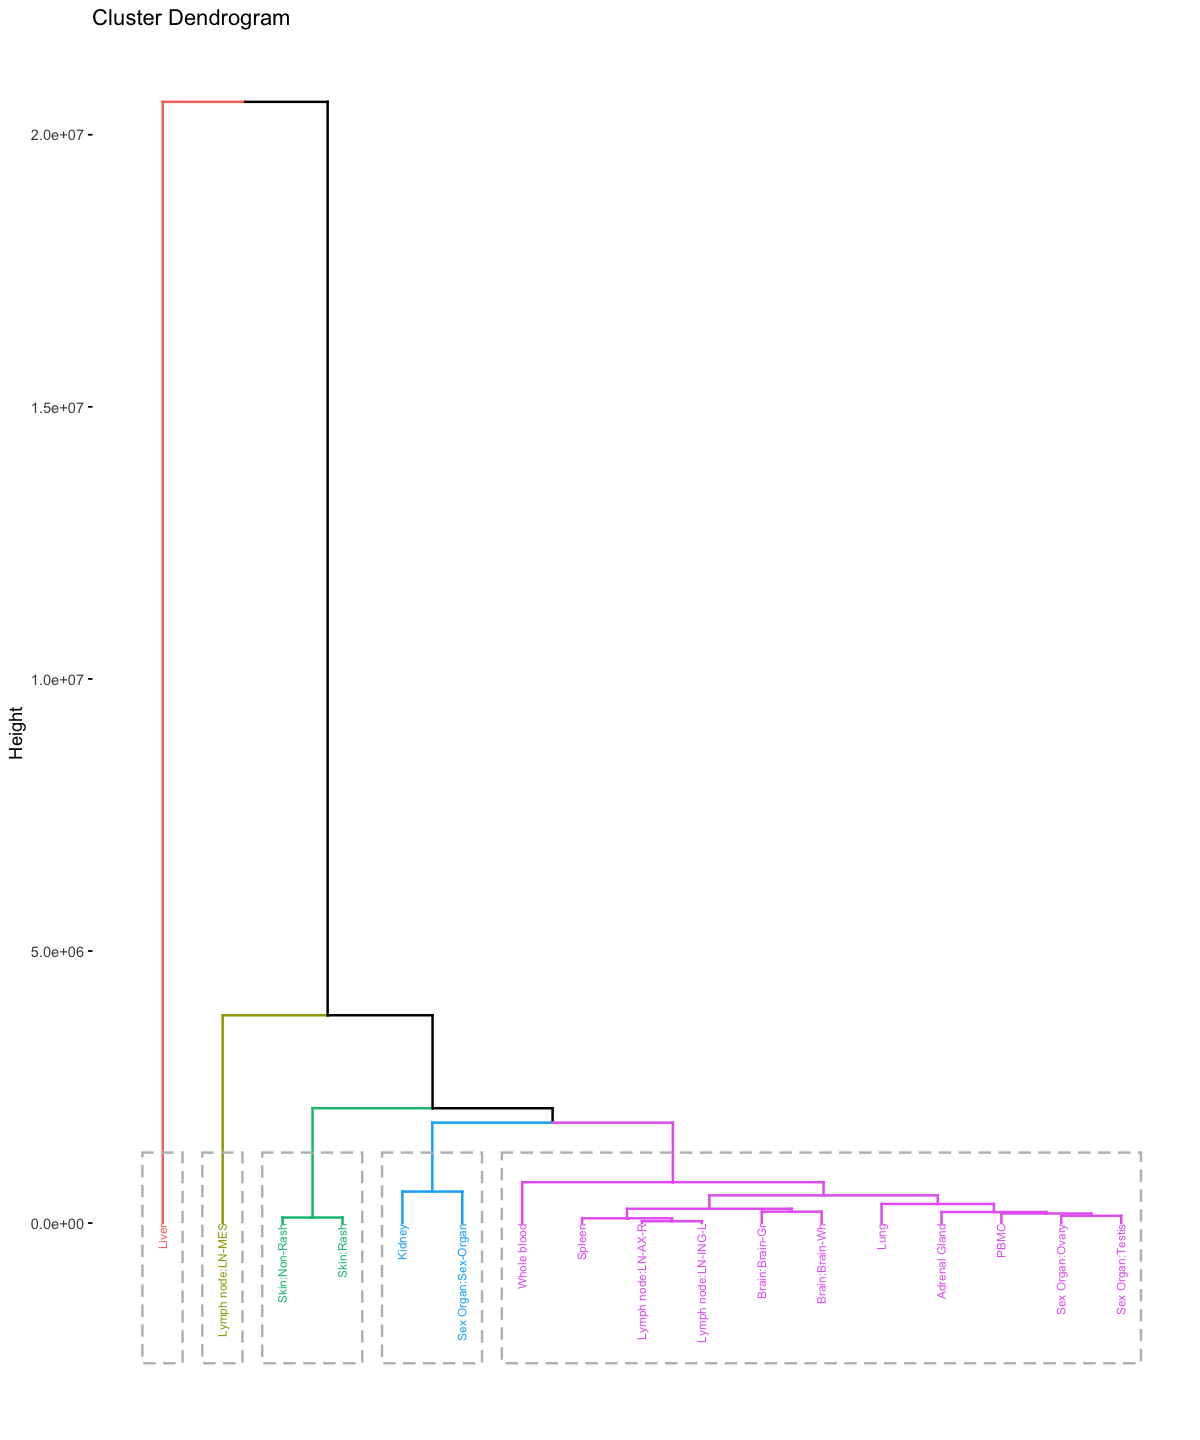

In [697]:
library("factoextra")
# K-means clustering
res.hc <- eclust(dd.melt.mean, "hclust", k = 5,
                method = "complete", graph = FALSE) 
fviz_dend(res.hc, rect = TRUE, show_labels = TRUE, cex = 0.5)

,Var1,Var2,value,full.tissue
,<fct>,<fct>,<dbl>,<fct>
1,ENSMMUG00000023296.4,A0001_S121_L002,7.408568,NA
2,ENSMMUG00000036181.3,A0001_S121_L002,0.000000,NA
3,ENSMMUG00000000634.4,A0001_S121_L002,133.032109,NA
4,ENSMMUG00000037875.2,A0001_S121_L002,51.537863,NA
5,ENSMMUG00000000632.4,A0001_S121_L002,128.522546,NA
6,ENSMMUG00000064799.1,A0001_S121_L002,0.000000,NA


,Group.1,x.ENSMMUG00000023296.4,x.ENSMMUG00000036181.3,x.ENSMMUG00000000634.4,x.ENSMMUG00000037875.2,x.ENSMMUG00000000632.4,x.ENSMMUG00000064799.1,x.ENSMMUG00000057389.1,x.ENSMMUG00000031200.3,x.ENSMMUG00000052613.1,⋯,x.EBOV-5pLeader,x.EBOV-NP,x.EBOV-VP35,x.EBOV-VP40,x.EBOV-GP,x.EBOV-VP30,x.EBOV-MidReg,x.EBOV-VP24,x.EBOV-L,x.EBOV-3pTrailer
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Adrenal Gland,0.5164600,0.00000000,198.99639,97.41703,73.37188,1.5448815,13.334915,7.738808,12.659288,⋯,0,1.2217041,1.560842e-01,0.9365049,4.193577e+01,1.552368e+00,0.0000000,4.412833e-01,9.365049e-01,0.00000000
2,Brain:Brain-Gr,2.6578698,0.06029534,370.78984,61.70509,430.91307,2.1876088,14.895374,10.570992,5.857824,⋯,0,0.2303444,5.478761e-02,0.0000000,1.228470e-01,7.944627e-02,0.0000000,5.478761e-02,2.432564e-01,0.00000000
3,Brain:Brain-Wh,2.2897452,0.00000000,435.83067,53.09597,396.90138,0.8607116,11.945864,7.429209,5.643945,⋯,0,0.0000000,0.000000e+00,0.0000000,0.000000e+00,0.000000e+00,0.0000000,0.000000e+00,0.000000e+00,0.00000000
4,Kidney,2.8820183,0.00000000,117.81060,50.12074,190.60206,1.2956720,53.457466,10.126743,5.925958,⋯,0,5.0294909,9.726708e-01,3.6127773,6.688453e+00,1.111624e+00,0.0000000,1.250577e+00,4.816852e+00,1.38952974
5,Liver,6.3545656,0.00000000,259.56669,85.57614,394.21431,0.0000000,11.816137,4.378318,7.961525,⋯,0,5770.9980514,2.551540e+03,3646.1598892,7.199323e+03,1.118163e+03,2.1393652,1.399154e+03,5.513375e+03,99.21803475
6,Lung,0.0000000,0.00000000,241.96866,44.57967,240.39456,0.0000000,3.694215,29.553723,22.165293,⋯,0,14.7768617,0.000000e+00,7.3884308,2.004786e+01,2.216529e+01,0.0000000,0.000000e+00,2.374208e+01,0.00000000
7,Lymph node:LN-AX-R,7.2719795,0.24948112,289.22703,46.20618,192.46497,0.1708824,9.567711,17.218101,20.863492,⋯,0,1.6063036,4.674989e-01,0.8261168,2.003301e+00,6.066506e-01,0.0000000,7.831136e-01,3.012334e+00,0.20524558
8,Lymph node:LN-ING-L,5.7617465,0.45231410,262.22248,56.85432,175.64863,0.3588965,10.843384,16.878498,19.777580,⋯,0,1.9569499,4.334882e-01,1.6104258,2.821668e+00,8.277280e-01,0.0000000,1.313042e+00,5.414600e+00,0.26071895
9,Lymph node:LN-MES,6.5812567,0.37561783,294.09488,51.07435,191.50193,0.2679033,8.792250,18.855200,22.264422,⋯,0,1.2594439,2.029289e-01,1.0447371,1.721669e+00,1.980966e-01,0.0000000,3.961931e-01,1.656504e+00,0.06603218


,x.ENSMMUG00000023296.4,x.ENSMMUG00000036181.3,x.ENSMMUG00000000634.4,x.ENSMMUG00000037875.2,x.ENSMMUG00000000632.4,x.ENSMMUG00000064799.1,x.ENSMMUG00000057389.1,x.ENSMMUG00000031200.3,x.ENSMMUG00000052613.1,x.ENSMMUG00000031199.3,⋯,x.EBOV-5pLeader,x.EBOV-NP,x.EBOV-VP35,x.EBOV-VP40,x.EBOV-GP,x.EBOV-VP30,x.EBOV-MidReg,x.EBOV-VP24,x.EBOV-L,x.EBOV-3pTrailer
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Adrenal Gland,0.516460,0.00000000,198.9964,97.41703,73.37188,1.5448815,13.334915,7.738808,12.659288,0.000000,⋯,0,1.2217041,1.560842e-01,0.9365049,41.935772,1.552368e+00,0.000000,4.412833e-01,0.9365049,0.00000
Brain:Brain-Gr,2.657870,0.06029534,370.7898,61.70509,430.91307,2.1876088,14.895374,10.570992,5.857824,4.360415,⋯,0,0.2303444,5.478761e-02,0.0000000,0.122847,7.944627e-02,0.000000,5.478761e-02,0.2432564,0.00000
Brain:Brain-Wh,2.289745,0.00000000,435.8307,53.09597,396.90138,0.8607116,11.945864,7.429209,5.643945,0.000000,⋯,0,0.0000000,0.000000e+00,0.0000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.0000000,0.00000
Kidney,2.882018,0.00000000,117.8106,50.12074,190.60206,1.2956720,53.457466,10.126743,5.925958,0.000000,⋯,0,5.0294909,9.726708e-01,3.6127773,6.688453,1.111624e+00,0.000000,1.250577e+00,4.8168523,1.38953
Liver,6.354566,0.00000000,259.5667,85.57614,394.21431,0.0000000,11.816137,4.378318,7.961525,0.000000,⋯,0,5770.9980514,2.551540e+03,3646.1598892,7199.323013,1.118163e+03,2.139365,1.399154e+03,5513.3749128,99.21803
Lung,0.000000,0.00000000,241.9687,44.57967,240.39456,0.0000000,3.694215,29.553723,22.165293,0.000000,⋯,0,14.7768617,0.000000e+00,7.3884308,20.047861,2.216529e+01,0.000000,0.000000e+00,23.7420767,0.00000


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


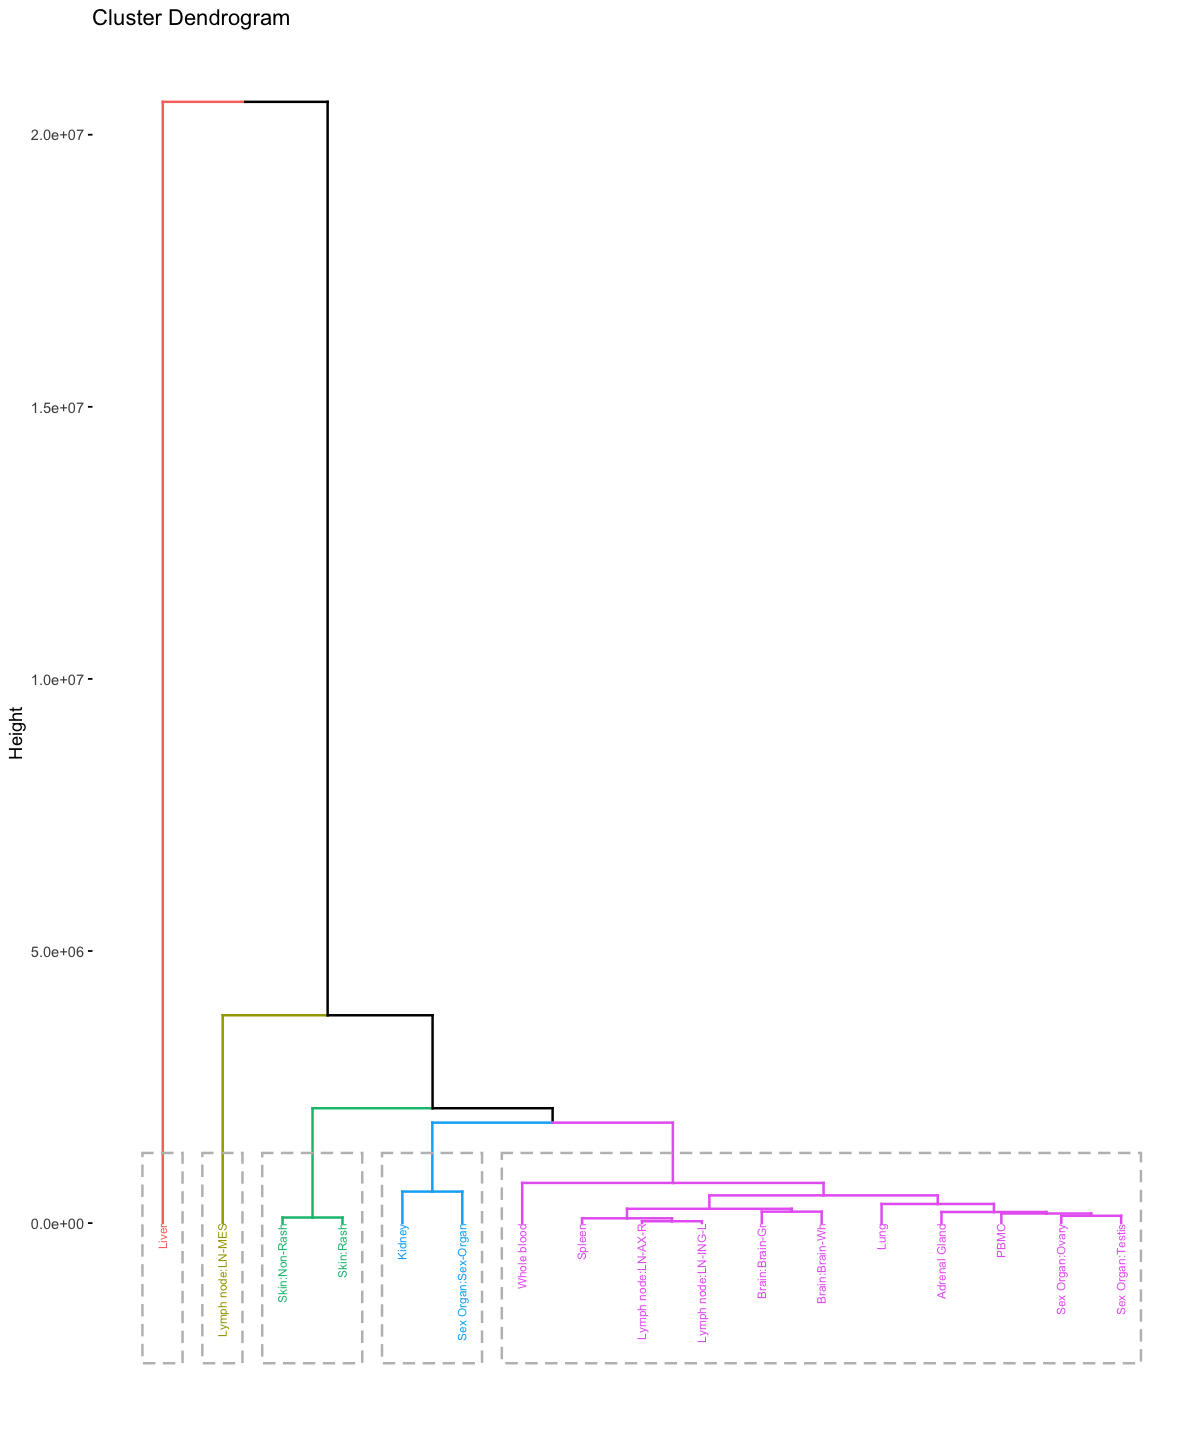

In [691]:
norm_counts <- counts(dds.qc.experimental.alltp, normalized=TRUE)
dd.melt2<-reshape2::melt(norm_counts)
dd.melt2$full.tissue<-colData(dds.qc.experimental.alltp)[dd.melt2$Var2,]$full.tissue
dd.melt2$full.tissue<-colData(dds.qc.experimental.alltp)[dd.melt2$Var2,]$
head(dd.melt2)
dd.melt2.mean<-aggregate(dd.melt2$value, list(dd.melt2$full.tissue,dd.melt2$Var1,), FUN=mean)
dd.melt2.mean<-reshape(dd.melt2.mean, idvar = "Group.1", timevar = "Group.2", direction = "wide")
dd.melt2.mean
rownames(dd.melt2.mean)<-dd.melt2.mean$Group.1
dd.melt2.mean$Group.1<-NULL
head(dd.melt2.mean)
res.hc <- eclust(dd.melt2.mean, "hclust", k = 5,
                method = "complete", graph = FALSE) 
fviz_dend(res.hc, rect = TRUE, show_labels = TRUE, cex = 0.5)

In [704]:
marker.genes <- marker.genes.full.bind %>% group_by(tissue) %>% top_n(20, log2FoldChange)
head(marker.genes)


tissue,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Geneid,Chr,Start,⋯,dispMAP,Intercept,SE_Intercept,WaldStatistic_Intercept,WaldPvalue_Intercept,betaConv,betaIter,deviance,maxCooks,replace
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<lgl>,<lgl>
Adrenal Gland,2263.510154,13.47184,0.3697961,36.43044,1.403824e-290,1.842800e-286,ENSMMUG00000009971.4,chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7,155069400;155069400;155069400;155069400;155069723;155069917;155069939;155069939;155070963;155070963;155070963;155070963;155070963;155073106;155073367;155073367;155073367;155073367;155073367;155073367;155074314;155074314;155074314;155074314;155074314;155074314;155076402;155076402;155076402;155076402;155076402;155076402;155077930;155077930;155077930;155077930;155077930;155077930;155079061;155079061;155079061;155079061;155079061;155079061;155081527;155081527;155081527;155081727,⋯,6.981383,7.7768088,0.2173715,35.776587,2.554578e-280,TRUE,1,2579.1980,NA,TRUE
Adrenal Gland,4568.132635,16.84842,0.6280455,26.82675,1.575433e-158,1.378714e-154,ENSMMUG00000013722.4,chr10;chr10;chr10;chr10;chr10;chr10;chr10;chr10;chr10;chr10;chr10;chr10;chr10;chr10;chr10;chr10;chr10;chr10;chr10;chr10;chr10;chr10;chr10;chr10;chr10;chr10;chr10;chr10;chr10;chr10;chr10;chr10,60586912;60590123;60590123;60590123;60590123;60590127;60591374;60591374;60591374;60591374;60591374;60591374;60592511;60598579;60598579;60598579;60598579;60598579;60599126;60599126;60599126;60599126;60599126;60601371;60602228;60603453;60603453;60603870;60603870;60603870;60603870;60603870,⋯,18.745387,7.8878483,0.3560097,22.156272,9.075982e-109,TRUE,1,1690.9677,NA,TRUE
Adrenal Gland,872.910433,10.81607,0.4464257,24.22815,1.123814e-129,4.917435e-126,ENSMMUG00000052920.1,chr6;chr6;chr6;chr6;chr6;chr6;chr6;chr6;chr6;chr6;chr6;chr6;chr6;chr6;chr6;chr6;chr6,173219721;173219873;173219885;173232503;173232503;173232503;173277477;173294103;173294835;173302029;173302029;173302029;173302284;173302284;173303219;173303219;173303345,⋯,15.207595,8.8316698,0.3206295,27.544779,5.110816e-167,TRUE,1,1854.6542,NA,TRUE
Adrenal Gland,31.932936,10.86792,0.5756397,18.87973,1.674402e-79,1.911294e-76,ENSMMUG00000011154.4,chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX,127186426;127187097;127307666;127332838;127332838;127352448;127356176;127356176;127356176;127356176;127357575;127357575;127357575;127358147;127358147;127358147;127358147;127358628;127358628;127358628;127358628;127359042;127359042;127359042;127359042;127359331;127359331;127359331;127359331;127360026;127360026;127360026;127360026;127360351;127360351;127360351;127360351;127360767;127360767;127360767;127360767;127360997;127360997;127360997;127360997;127363066;127363066;127363066;127363066,⋯,7.071232,0.7795556,0.2321922,3.357372,7.868705e-04,TRUE,1,843.9733,NA,TRUE
Adrenal Gland,2.230527,19.98897,1.4181813,14.09479,4.088486e-45,6.314065e-43,ENSMMUG00000027266.3,chr7,163282152,⋯,5.622799,-0.8886833,0.2293951,-3.874029,1.070508e-04,TRUE,1,650.2117,NA,TRUE
Adrenal Gland,67.555664,11.93951,0.8482157,14.07603,5.332176e-45,8.139009e-43,ENSMMUG00000018918.4,chr12;chr12;chr12;chr12,111032516;111035015;111035930;111040430,⋯,11.286288,4.2394525,0.2776103,15.271239,1.188929e-52,TRUE,1,1430.0160,NA,TRUE


In [378]:
unique(marker.genes$tissue)

[1] "Adrenal Gland"       "Brain:Brain-Gr"      "Brain:Brain-Wh"     
 [4] "Kidney"              "Liver"               "Lung"               
 [7] "Lymph node:LN-AX-R"  "Lymph node:LN-ING-L" "Lymph node:LN-MES"  
[10] "PBMC"                "Sex Organ:Ovary"     "Sex Organ:Sex-Organ"
[13] "Sex Organ:Testis"    "Skin:Non-Rash"       "Skin:Rash"          
[16] "Spleen"              "Whole blood"

In [379]:
head((marker.genes$Geneid))

[1] "ENSMMUG00000009971.4" "ENSMMUG00000013722.4" "ENSMMUG00000052920.1"
[4] "ENSMMUG00000011154.4" "ENSMMUG00000027266.3" "ENSMMUG00000018918.4"

In [719]:
norm_counts <- counts(dds.qc.experimental, normalized=TRUE)
norm_counts <- log10(norm_counts+1)
scale_norm_markers <- scale(norm_counts[tissue_markers,],center = T,scale=T)
marker.genes <- marker.genes.full.bind %>% group_by(tissue) %>% top_n(20, log2FoldChange)
head(marker.genes)
tissue_markers <- unique(marker.genes$Geneid)
tissue_markers
threshold <- 1
scale_norm_markers[scale_norm_markers>threshold] <- threshold
scale_norm_markers[scale_norm_markers< (-1*threshold)] <- -1*threshold
rownames(scale_norm_markers) <- rowData(dds.qc.experimental)[rownames(scale_norm_markers),]$external_gene_name
scale_norm_markers <- scale_norm_markers[rownames(scale_norm_markers) != '',]

tissue,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Geneid,Chr,Start,⋯,dispMAP,Intercept,SE_Intercept,WaldStatistic_Intercept,WaldPvalue_Intercept,betaConv,betaIter,deviance,maxCooks,replace
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<lgl>,<lgl>
Adrenal Gland,2263.510154,13.47184,0.3697961,36.43044,1.403824e-290,1.842800e-286,ENSMMUG00000009971.4,chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7,155069400;155069400;155069400;155069400;155069723;155069917;155069939;155069939;155070963;155070963;155070963;155070963;155070963;155073106;155073367;155073367;155073367;155073367;155073367;155073367;155074314;155074314;155074314;155074314;155074314;155074314;155076402;155076402;155076402;155076402;155076402;155076402;155077930;155077930;155077930;155077930;155077930;155077930;155079061;155079061;155079061;155079061;155079061;155079061;155081527;155081527;155081527;155081727,⋯,6.981383,7.7768088,0.2173715,35.776587,2.554578e-280,TRUE,1,2579.1980,NA,TRUE
Adrenal Gland,4568.132635,16.84842,0.6280455,26.82675,1.575433e-158,1.378714e-154,ENSMMUG00000013722.4,chr10;chr10;chr10;chr10;chr10;chr10;chr10;chr10;chr10;chr10;chr10;chr10;chr10;chr10;chr10;chr10;chr10;chr10;chr10;chr10;chr10;chr10;chr10;chr10;chr10;chr10;chr10;chr10;chr10;chr10;chr10;chr10,60586912;60590123;60590123;60590123;60590123;60590127;60591374;60591374;60591374;60591374;60591374;60591374;60592511;60598579;60598579;60598579;60598579;60598579;60599126;60599126;60599126;60599126;60599126;60601371;60602228;60603453;60603453;60603870;60603870;60603870;60603870;60603870,⋯,18.745387,7.8878483,0.3560097,22.156272,9.075982e-109,TRUE,1,1690.9677,NA,TRUE
Adrenal Gland,872.910433,10.81607,0.4464257,24.22815,1.123814e-129,4.917435e-126,ENSMMUG00000052920.1,chr6;chr6;chr6;chr6;chr6;chr6;chr6;chr6;chr6;chr6;chr6;chr6;chr6;chr6;chr6;chr6;chr6,173219721;173219873;173219885;173232503;173232503;173232503;173277477;173294103;173294835;173302029;173302029;173302029;173302284;173302284;173303219;173303219;173303345,⋯,15.207595,8.8316698,0.3206295,27.544779,5.110816e-167,TRUE,1,1854.6542,NA,TRUE
Adrenal Gland,31.932936,10.86792,0.5756397,18.87973,1.674402e-79,1.911294e-76,ENSMMUG00000011154.4,chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX,127186426;127187097;127307666;127332838;127332838;127352448;127356176;127356176;127356176;127356176;127357575;127357575;127357575;127358147;127358147;127358147;127358147;127358628;127358628;127358628;127358628;127359042;127359042;127359042;127359042;127359331;127359331;127359331;127359331;127360026;127360026;127360026;127360026;127360351;127360351;127360351;127360351;127360767;127360767;127360767;127360767;127360997;127360997;127360997;127360997;127363066;127363066;127363066;127363066,⋯,7.071232,0.7795556,0.2321922,3.357372,7.868705e-04,TRUE,1,843.9733,NA,TRUE
Adrenal Gland,2.230527,19.98897,1.4181813,14.09479,4.088486e-45,6.314065e-43,ENSMMUG00000027266.3,chr7,163282152,⋯,5.622799,-0.8886833,0.2293951,-3.874029,1.070508e-04,TRUE,1,650.2117,NA,TRUE
Adrenal Gland,67.555664,11.93951,0.8482157,14.07603,5.332176e-45,8.139009e-43,ENSMMUG00000018918.4,chr12;chr12;chr12;chr12,111032516;111035015;111035930;111040430,⋯,11.286288,4.2394525,0.2776103,15.271239,1.188929e-52,TRUE,1,1430.0160,NA,TRUE


[1] "ENSMMUG00000009971.4" "ENSMMUG00000013722.4" "ENSMMUG00000052920.1"
  [4] "ENSMMUG00000011154.4" "ENSMMUG00000027266.3" "ENSMMUG00000018918.4"
  [7] "ENSMMUG00000046980.2" "ENSMMUG00000019377.4" "ENSMMUG00000055168.1"
 [10] "ENSMMUG00000018670.4" "ENSMMUG00000000157.4" "ENSMMUG00000049903.1"
 [13] "ENSMMUG00000003912.4" "ENSMMUG00000013631.4" "ENSMMUG00000012841.4"
 [16] "ENSMMUG00000016568.4" "ENSMMUG00000049644.1" "ENSMMUG00000008747.4"
 [19] "ENSMMUG00000008922.4" "ENSMMUG00000000959.3" "ENSMMUG00000043629.2"
 [22] "ENSMMUG00000000137.4" "ENSMMUG00000043598.2" "ENSMMUG00000012787.4"
 [25] "ENSMMUG00000016108.4" "ENSMMUG00000059515.1" "ENSMMUG00000020305.4"
 [28] "ENSMMUG00000020299.4" "ENSMMUG00000038207.2" "ENSMMUG00000052534.1"
 [31] "ENSMMUG00000021750.3" "ENSMMUG00000045776.2" "ENSMMUG00000014971.4"
 [34] "ENSMMUG00000042415.2" "ENSMMUG00000040394.2" "ENSMMUG00000013115.4"
 [37] "ENSMMUG00000020837.4" "ENSMMUG00000051408.1" "ENSMMUG00000043846.2"
 [40] "ENSMMUG00000023796.4" "ENSMMUG00000016727.4" "ENSMMUG00000006935.4"
 [43] "ENSMMUG00000011718.4" "ENSMMUG00000008087.3" "ENSMMUG00000038256.2"
 [46] "ENSMMUG00000016567.4" "ENSMMUG00000006464.4" "ENSMMUG00000054315.1"
 [49] "ENSMMUG00000061111.1" "ENSMMUG00000049286.1" "ENSMMUG00000051719.1"
 [52] "ENSMMUG00000064729.1" "ENSMMUG00000060306.1" "ENSMMUG00000007725.3"
 [55] "ENSMMUG00000011218.4" "ENSMMUG00000008559.4" "ENSMMUG00000037639.2"
 [58] "ENSMMUG00000011177.4" "ENSMMUG00000007692.4" "ENSMMUG00000021302.4"
 [61] "ENSMMUG00000023701.4" "ENSMMUG00000002018.3" "ENSMMUG00000021862.4"
 [64] "ENSMMUG00000023435.4" "ENSMMUG00000025378.3" "ENSMMUG00000022992.4"
 [67] "ENSMMUG00000017818.4" "ENSMMUG00000019873.4" "ENSMMUG00000010000.4"
 [70] "ENSMMUG00000017631.4" "ENSMMUG00000021135.4" "ENSMMUG00000057196.1"
 [73] "ENSMMUG00000000048.4" "ENSMMUG00000019727.4" "ENSMMUG00000016871.4"
 [76] "ENSMMUG00000013446.4" "ENSMMUG00000013029.4" "ENSMMUG00000006632.4"
 [79] "ENSMMUG00000002787.4" "ENSMMUG00000009641.4" "ENSMMUG00000047229.2"
 [82] "ENSMMUG00000000017.4" "ENSMMUG00000057247.1" "ENSMMUG00000063081.1"
 [85] "ENSMMUG00000053863.1" "ENSMMUG00000019749.4" "ENSMMUG00000022463.4"
 [88] "ENSMMUG00000002684.4" "ENSMMUG00000004250.4" "ENSMMUG00000021286.4"
 [91] "ENSMMUG00000001467.4" "ENSMMUG00000062248.1" "ENSMMUG00000058472.1"
 [94] "ENSMMUG00000020987.4" "ENSMMUG00000054206.1" "ENSMMUG00000028710.3"
 [97] "ENSMMUG00000003827.4" "ENSMMUG00000042371.2" "ENSMMUG00000060507.1"
[100] "ENSMMUG00000015297.4" "ENSMMUG00000024671.3" "ENSMMUG00000060156.1"
[103] "ENSMMUG00000059959.1" "ENSMMUG00000058506.1" "ENSMMUG00000014640.4"
[106] "ENSMMUG00000006868.4" "ENSMMUG00000016737.4" "ENSMMUG00000004489.4"
[109] "ENSMMUG00000008407.4" "ENSMMUG00000061702.1" "ENSMMUG00000010291.4"
[112] "ENSMMUG00000002657.4" "ENSMMUG00000064655.1" "ENSMMUG00000064796.1"
[115] "ENSMMUG00000006113.4" "ENSMMUG00000018216.4" "ENSMMUG00000051816.1"
[118] "ENSMMUG00000056940.1" "ENSMMUG00000054634.1" "ENSMMUG00000055266.1"
[121] "ENSMMUG00000051158.1" "ENSMMUG00000064447.1" "ENSMMUG00000055038.1"
[124] "ENSMMUG00000010953.4" "ENSMMUG00000049384.1" "ENSMMUG00000023060.4"
[127] "ENSMMUG00000019257.3" "ENSMMUG00000022280.4" "ENSMMUG00000004837.4"
[130] "ENSMMUG00000019835.4" "ENSMMUG00000008367.4" "ENSMMUG00000014111.4"
[133] "ENSMMUG00000064455.1" "ENSMMUG00000018270.4" "ENSMMUG00000005570.4"
[136] "ENSMMUG00000012123.4" "ENSMMUG00000044429.2" "ENSMMUG00000008429.4"
[139] "ENSMMUG00000014383.3" "ENSMMUG00000041831.2" "ENSMMUG00000013634.4"
[142] "ENSMMUG00000029310.3" "ENSMMUG00000000730.4" "ENSMMUG00000011690.4"
[145] "ENSMMUG00000020090.4" "ENSMMUG00000019566.4" "ENSMMUG00000060914.1"
[148] "ENSMMUG00000000552.4" "ENSMMUG00000001966.4"

In [384]:
library(pheatmap)
library(viridis)

In [386]:
options(repr.plot.width = 10, repr.plot.height = 12)

In [712]:
temp<-read.csv(file = "../05-sample_overview/full_tissue_color.csv",header = F)
color_ft<-temp$V2
names(color_ft)<-temp$V1
color_ft

Spleen              Kidney       Adrenal Gland      Brain:Brain-Gr 
          "#BC80BD"           "#BEBADA"           "#8DD3C7"           "#FB8072" 
     Brain:Brain-Wh               Liver                Lung  Lymph node:LN-AX-R 
          "#a34136"           "#fff265"           "#80B1D3"           "#FDB462" 
Lymph node:LN-ING-L   Lymph node:LN-MES       Lymph node:NA                PBMC 
          "#ed830c"           "#f5b771"           "#ff8700"           "#B3DE69" 
    Sex Organ:Ovary Sex Organ:Sex-Organ    Sex Organ:Testis       Skin:Non-Rash 
          "#e64e9b"           "#FCCDE5"           "#a82d6c"           "#6e6969" 
          Skin:Rash          SpinalCord         Whole blood 
          "#D9D9D9"           "#f93d28"           "#CCEBC5"

In [713]:
colnames(colData(dds.qc.experimental))

[1] "file_identifiers"              "A.identifier"                 
 [3] "biosample"                     "batch.extraction"             
 [5] "irf.study.id"                  "id.cohort"                    
 [7] "id.individual"                 "tissue"                       
 [9] "data.received"                 "dn.rna"                       
[11] "date.broad.extract"            "quant.18s"                    
[13] "quant.18s.sd"                  "quant.kulesh"                 
[15] "quant.kulesh.sd"               "rin.e"                        
[17] "rna.conc.ng.uL"                "lib.conc.pmolar"              
[19] "xgen.index"                    "Assigned"                     
[21] "Unassigned_Unmapped"           "Unassigned_Read_Type"         
[23] "Unassigned_Singleton"          "Unassigned_MappingQuality"    
[25] "Unassigned_Chimera"            "Unassigned_FragmentLength"    
[27] "Unassigned_Duplicate"          "Unassigned_MultiMapping"      
[29] "Unassigned_Secondary"          "Unassigned_NonSplit"          
[31] "Unassigned_NoFeatures"         "Unassigned_Overlapping_Length"
[33] "Unassigned_Ambiguity"          "sub.tissue"                   
[35] "SampleType"                    "study.group"                  
[37] "challenge.group"               "animal.number"                
[39] "animal.tatoo"                  "sex"                          
[41] "weight"                        "birth.date"                   
[43] "viralReadCount"                "hostReadCount"                
[45] "pc.viral.reads"                "cohort.uncertain"             
[47] "cohort.numeric"                "totalReadCount"               
[49] "totalUnassigned"               "chrY_count"                   
[51] "chrX_count"                    "total_count"                  
[53] "Xist"                          "sex.1"                        
[55] "pc_Y"                          "pc_X"                         
[57] "Y_X_ratio"                     "sex_pred"                     
[59] "pred_recorded_sex_mismatch"    "dpi_time"                     
[61] "dpi_time_factor"               "xist_counts"                  
[63] "predicted_sex"                 "pred_rec_sex_mismatch"        
[65] "full.tissue"                   "sample_id_dedup"              
[67] "duplicate_sequencing"          "dpi_time_2"                   
[69] "sizeFactor"                    "replaceable"

In [714]:
head(marker.genes)

tissue,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Geneid,Chr,Start,⋯,dispMAP,Intercept,SE_Intercept,WaldStatistic_Intercept,WaldPvalue_Intercept,betaConv,betaIter,deviance,maxCooks,replace
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<lgl>,<lgl>
Adrenal Gland,2263.510154,13.47184,0.3697961,36.43044,1.403824e-290,1.842800e-286,ENSMMUG00000009971.4,chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7,155069400;155069400;155069400;155069400;155069723;155069917;155069939;155069939;155070963;155070963;155070963;155070963;155070963;155073106;155073367;155073367;155073367;155073367;155073367;155073367;155074314;155074314;155074314;155074314;155074314;155074314;155076402;155076402;155076402;155076402;155076402;155076402;155077930;155077930;155077930;155077930;155077930;155077930;155079061;155079061;155079061;155079061;155079061;155079061;155081527;155081527;155081527;155081727,⋯,6.981383,7.7768088,0.2173715,35.776587,2.554578e-280,TRUE,1,2579.1980,NA,TRUE
Adrenal Gland,4568.132635,16.84842,0.6280455,26.82675,1.575433e-158,1.378714e-154,ENSMMUG00000013722.4,chr10;chr10;chr10;chr10;chr10;chr10;chr10;chr10;chr10;chr10;chr10;chr10;chr10;chr10;chr10;chr10;chr10;chr10;chr10;chr10;chr10;chr10;chr10;chr10;chr10;chr10;chr10;chr10;chr10;chr10;chr10;chr10,60586912;60590123;60590123;60590123;60590123;60590127;60591374;60591374;60591374;60591374;60591374;60591374;60592511;60598579;60598579;60598579;60598579;60598579;60599126;60599126;60599126;60599126;60599126;60601371;60602228;60603453;60603453;60603870;60603870;60603870;60603870;60603870,⋯,18.745387,7.8878483,0.3560097,22.156272,9.075982e-109,TRUE,1,1690.9677,NA,TRUE
Adrenal Gland,872.910433,10.81607,0.4464257,24.22815,1.123814e-129,4.917435e-126,ENSMMUG00000052920.1,chr6;chr6;chr6;chr6;chr6;chr6;chr6;chr6;chr6;chr6;chr6;chr6;chr6;chr6;chr6;chr6;chr6,173219721;173219873;173219885;173232503;173232503;173232503;173277477;173294103;173294835;173302029;173302029;173302029;173302284;173302284;173303219;173303219;173303345,⋯,15.207595,8.8316698,0.3206295,27.544779,5.110816e-167,TRUE,1,1854.6542,NA,TRUE
Adrenal Gland,31.932936,10.86792,0.5756397,18.87973,1.674402e-79,1.911294e-76,ENSMMUG00000011154.4,chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX,127186426;127187097;127307666;127332838;127332838;127352448;127356176;127356176;127356176;127356176;127357575;127357575;127357575;127358147;127358147;127358147;127358147;127358628;127358628;127358628;127358628;127359042;127359042;127359042;127359042;127359331;127359331;127359331;127359331;127360026;127360026;127360026;127360026;127360351;127360351;127360351;127360351;127360767;127360767;127360767;127360767;127360997;127360997;127360997;127360997;127363066;127363066;127363066;127363066,⋯,7.071232,0.7795556,0.2321922,3.357372,7.868705e-04,TRUE,1,843.9733,NA,TRUE
Adrenal Gland,2.230527,19.98897,1.4181813,14.09479,4.088486e-45,6.314065e-43,ENSMMUG00000027266.3,chr7,163282152,⋯,5.622799,-0.8886833,0.2293951,-3.874029,1.070508e-04,TRUE,1,650.2117,NA,TRUE
Adrenal Gland,67.555664,11.93951,0.8482157,14.07603,5.332176e-45,8.139009e-43,ENSMMUG00000018918.4,chr12;chr12;chr12;chr12,111032516;111035015;111035930;111040430,⋯,11.286288,4.2394525,0.2776103,15.271239,1.188929e-52,TRUE,1,1430.0160,NA,TRUE


In [720]:
unique(dds.qc.experimental$full.tissue)
color_ft[unique(dds.qc.experimental$full.tissue)]
dpi_time=brewer.pal(n = 8, name = "Blues")
names(dpi_time)=as.character(unique(dds.qc.experimental$dpi_time_factor))
dpi_time
unique(as.data.frame(colData(dds.qc.experimental))[,c('full.tissue','dpi_time_factor'),drop=FALSE]$dpi_time_factor)
col.order<-rownames(as.data.frame(colData(dds.qc.experimental))[c('full.tissue','dpi_time_factor')] %>% 
                dplyr::arrange(full.tissue,dpi_time_factor))
head(col.order)
head(scale_norm_markers[,col.order])
as.character(unique(dds.qc.experimental$dpi_time))

[1] Spleen              Kidney              Adrenal Gland      
 [4] Brain:Brain-Gr      Sex Organ:Testis    Lymph node:LN-AX-R 
 [7] Lymph node:LN-ING-L Lymph node:LN-MES   Lung               
[10] Sex Organ:Sex-Organ Skin:Rash           Skin:Non-Rash      
[13] Sex Organ:Ovary     Liver               Brain:Brain-Wh     
[16] Whole blood         PBMC               
17 Levels: Adrenal Gland Brain:Brain-Gr Brain:Brain-Wh Kidney Liver ... Whole blood

Skin:Non-Rash      Brain:Brain-Gr              Spleen              Kidney 
          "#6e6969"           "#FB8072"           "#BC80BD"           "#BEBADA" 
    Sex Organ:Ovary                Lung  Lymph node:LN-AX-R Lymph node:LN-ING-L 
          "#e64e9b"           "#80B1D3"           "#FDB462"           "#ed830c" 
              Liver                PBMC    Sex Organ:Testis Sex Organ:Sex-Organ 
          "#fff265"           "#B3DE69"           "#a82d6c"           "#FCCDE5" 
      Lymph node:NA      Brain:Brain-Wh       Adrenal Gland           Skin:Rash 
          "#ff8700"           "#a34136"           "#8DD3C7"           "#D9D9D9" 
  Lymph node:LN-MES 
          "#f5b771"

4         3         0        <0         1         2      <NA>      <NA> 
"#F7FBFF" "#DEEBF7" "#C6DBEF" "#9ECAE1" "#6BAED6" "#4292C6" "#2171B5" "#084594"

[1] "4"  "3"  "0"  "<0" "1"  "2"

[1] "A0242" "A0256" "A0270" "A0088" "A0018" "A0172"

,A0242,A0256,A0270,A0088,A0018,A0172,A0244_S73_L002,A0258_S72_L002,A0272_S71_L002,A0062_S84_L002,⋯,A0333_S94_L001,A0337_S90_L001,A0342_S85_L001,A0347_S80_L001,A0352_S75_L001,A0356_S69_L001,A0360_S65_L001,A0364_S61_L001,A0369_S56_L001,A0374_S51_L001
CHGA,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.00000000,1.00000000,1.000000000,1.00000000,1.00000000,⋯,0.41312964,0.6390654,0.39292904,0.4700572,0.7489664,0.24733027,0.3384052,0.2547676,0.4964465,0.2415665
CHGB,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.00000000,1.00000000,1.000000000,1.00000000,1.00000000,⋯,-0.41449907,-0.4177390,-0.40065829,-0.4298645,-0.4502286,-0.41567534,-0.4318227,-0.4104961,-0.4337975,-0.4297305
CPLX2,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.00000000,1.00000000,1.000000000,1.00000000,1.00000000,⋯,-0.09255209,-0.4177390,-0.40065829,-0.1325076,-0.4502286,-0.01184591,-0.2033821,-0.4104961,-0.4337975,-0.4297305
ARHGAP36,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.00000000,0.07647784,-0.074786568,-0.31711198,0.15613429,⋯,-0.41449907,-0.4177390,-0.40065829,-0.4298645,-0.4502286,-0.41567534,-0.4318227,-0.4104961,-0.4337975,-0.4297305
SCG2,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.00000000,1.00000000,1.000000000,1.00000000,1.00000000,⋯,-0.41449907,-0.1060279,-0.02605777,-0.4298645,-0.4502286,-0.41567534,-0.4318227,-0.4104961,-0.4337975,-0.4297305
CPA4,-0.3679425,-0.3564978,0.4916468,-0.4753157,-0.3405064,-0.03186814,0.45980416,0.004611481,-0.03255733,0.04654934,⋯,-0.41449907,-0.4177390,-0.40065829,-0.4298645,-0.4502286,-0.41567534,-0.4318227,-0.4104961,-0.4337975,-0.4297305


[1] "4" "3" "0" "1" "2"

0         1         2         3         4 
"#EFF3FF" "#BDD7E7" "#6BAED6" "#3182BD" "#08519C"

$full.tissue
             Spleen              Kidney       Adrenal Gland      Brain:Brain-Gr 
          "#BC80BD"           "#BEBADA"           "#8DD3C7"           "#FB8072" 
     Brain:Brain-Wh               Liver                Lung  Lymph node:LN-AX-R 
          "#a34136"           "#fff265"           "#80B1D3"           "#FDB462" 
Lymph node:LN-ING-L   Lymph node:LN-MES       Lymph node:NA                PBMC 
          "#ed830c"           "#f5b771"           "#ff8700"           "#B3DE69" 
    Sex Organ:Ovary Sex Organ:Sex-Organ    Sex Organ:Testis       Skin:Non-Rash 
          "#e64e9b"           "#FCCDE5"           "#a82d6c"           "#6e6969" 
          Skin:Rash          SpinalCord         Whole blood 
          "#D9D9D9"           "#f93d28"           "#CCEBC5" 

$dpi_time
        0         1         2         3         4 
"#EFF3FF" "#BDD7E7" "#6BAED6" "#3182BD" "#08519C"

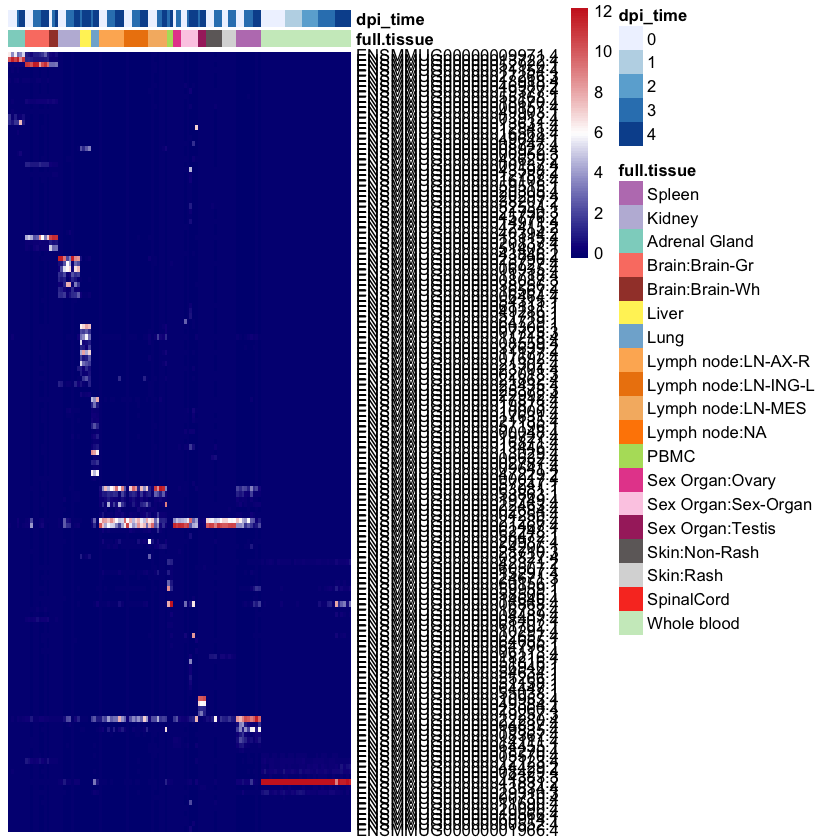

In [15]:
# List with colors for each annotation.
dpi_time=brewer.pal(n = 5, name = "Blues")
names(dpi_time)=sort(as.character(unique(dds.qc.experimental$dpi_time)))
dpi_time
mat_colors <- list(full.tissue=color_ft,dpi_time=dpi_time)
mat_colors

col.order<-rownames(as.data.frame(colData(dds.qc.experimental[,dds.qc.experimental$dpi_time_factor != '<0']))[,c('full.tissue','dpi_time')] %>% 
                 dplyr::arrange(full.tissue,dpi_time))

pheatmap(scale_norm_markers[,col.order],
         clustering_distance_cols = 'correlation',
         clustering_distance_rows='correlation',
         color=colorRampPalette(c("navy", "white","firebrick3"))(100),
         border_color=NA,
         show_colnames=FALSE,
         annotation_col=as.data.frame(colData(dds.qc.experimental[,dds.qc.experimental$dpi_time_factor != '<0']))[,c('full.tissue','dpi_time'),drop=FALSE],
         annotation_colors=mat_colors,cluster_cols = F,cluster_rows=F)


In [17]:
pheatmap(scale_norm_markers[,col.order],
         clustering_distance_cols = 'correlation',
         clustering_distance_rows='correlation',
         color=hcl.colors(100, palette = "YlGnBu"),
         border_color=NA,
         show_colnames=FALSE,
         annotation_col=as.data.frame(colData(dds.qc.experimental[,dds.qc.experimental$dpi_time_factor != '<0']))[,c('full.tissue','dpi_time'),drop=FALSE],
         annotation_colors=mat_colors,cluster_cols = F,filename="../heatmap_markers_2.pdf",width=10,height=40)


In [176]:
selected.tissue.markers <- c(
    # Spleen and Lymph Node
    'PVRIG',
    'CD19',
    'PAX5',
    'ITGB2',
    'PTPRC',
    'IKZF1',
    'IGHM',
    #'POU2AF1',
    'ETS1',
    # Sex Organ (Subgroup)
    'KRT1',
    'KRT10',
    'PKP1',
    'KRT5',
    'KRT16',
    # Skin
    'ENO3',
    'MYLPF', # This is a skeletal muschle gene
    'MYH1',
    'MYBPC2',
    'CKM',
    # Brain
    'MBP',
    'CPLX2',
    'BSN',
    'SNX32',
    'SYP',
    # Kidney
    'BHMT2', # also known to be abundant in liver
    'CUBN',
    'CDH16',
    'LRP2',
    'PIGR',
    # Adrenal
    'CHGA',
    'CHGB',
    # Lung
    'SFTPB',
    'SFTPC',
    'SFTPD',
    # Liver
    'ITIH4',
    'HP',
    'ITIH3',
    'SERPINA1'
    #'ORM1'    
)

In [398]:
dds.qc.experimental.alltp <- DESeqDataSet(se.qc.experimental.alltp,~1)
dds.qc.experimental.alltp <- DESeq(dds.qc.experimental.alltp)

Warning message in DESeq(dds.qc.experimental.alltp):
“the design is ~ 1 (just an intercept). is this intended?”
using pre-existing size factors

estimating dispersions

found already estimated dispersions, replacing these

gene-wise dispersion estimates

found already estimated gene-wise dispersions, removing these

mean-dispersion relationship

final dispersion estimates

found already estimated dispersions, removing these

fitting model and testing

-- replacing outliers and refitting for 4772 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



In [399]:
norm_counts.alltp <- counts(dds.qc.experimental.alltp, normalized=TRUE)
scale_norm_markers.alltp <- scale(norm_counts.alltp,center = T,scale=T)

threshold <- 1
scale_norm_markers.alltp[scale_norm_markers.alltp>threshold] <- threshold
scale_norm_markers.alltp[scale_norm_markers.alltp< (-1*threshold)] <- -1*threshold

rownames(scale_norm_markers.alltp) <- rowData(dds.qc.experimental)[rownames(scale_norm_markers.alltp),]$external_gene_name

In [4]:
load("tissue.markers.rda")

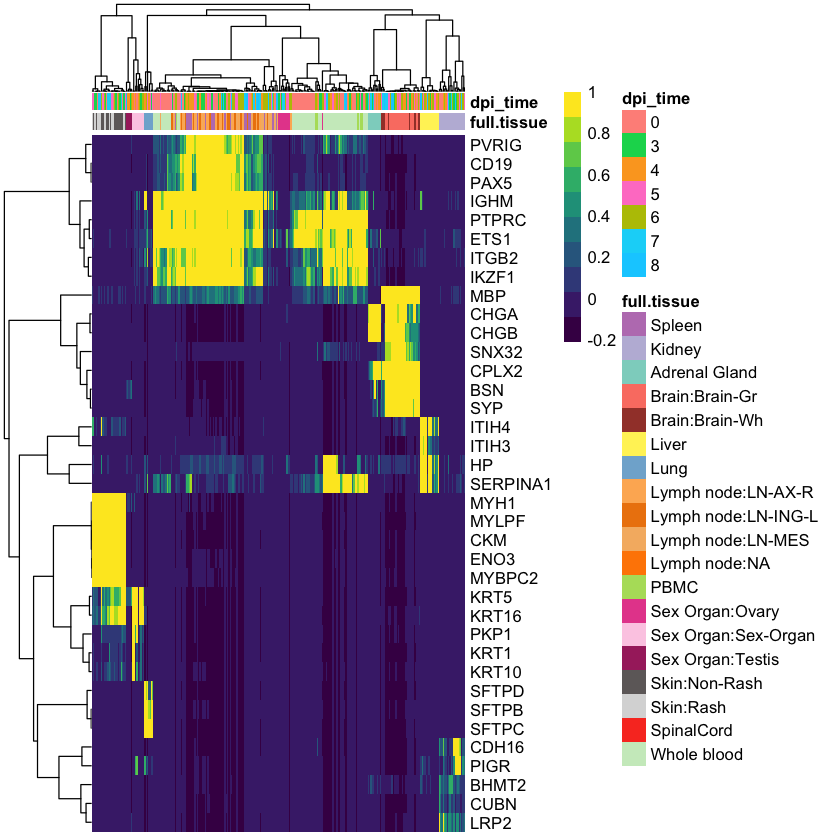

In [18]:
library(pheatmap)
library(viridis)
pheatmap(scale_norm_markers.alltp[selected.tissue.markers,],
         clustering_distance_cols = 'correlation',
         clustering_distance_rows='correlation',
         color=viridis(10),
         border_color=NA,
         show_colnames=FALSE,
         annotation_col=as.data.frame(colData(dds.qc.experimental.alltp))[,c('full.tissue','dpi_time'),drop=FALSE],
         annotation_colors=list(full.tissue=color_ft))

0         3         4         5         6         7         8 
"#EFF3FF" "#C6DBEF" "#9ECAE1" "#6BAED6" "#4292C6" "#2171B5" "#084594"

$full.tissue
             Spleen              Kidney       Adrenal Gland      Brain:Brain-Gr 
          "#BC80BD"           "#BEBADA"           "#8DD3C7"           "#FB8072" 
     Brain:Brain-Wh               Liver                Lung  Lymph node:LN-AX-R 
          "#a34136"           "#fff265"           "#80B1D3"           "#FDB462" 
Lymph node:LN-ING-L   Lymph node:LN-MES       Lymph node:NA                PBMC 
          "#ed830c"           "#f5b771"           "#ff8700"           "#B3DE69" 
    Sex Organ:Ovary Sex Organ:Sex-Organ    Sex Organ:Testis       Skin:Non-Rash 
          "#e64e9b"           "#FCCDE5"           "#a82d6c"           "#6e6969" 
          Skin:Rash          SpinalCord         Whole blood 
          "#D9D9D9"           "#f93d28"           "#CCEBC5" 

$dpi_time
        0         3         4         5         6         7         8 
"#EFF3FF" "#C6DBEF" "#9ECAE1" "#6BAED6" "#4292C6" "#2171B5" "#084594"

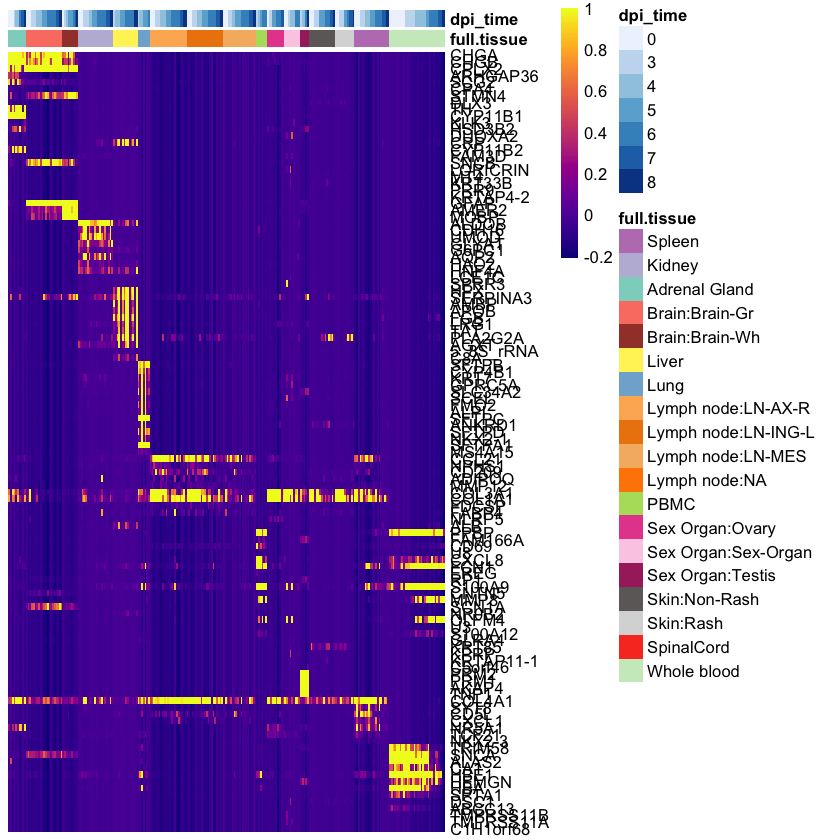

In [25]:
dpi_time=brewer.pal(n = length(unique(dds.qc.experimental.alltp$dpi_time)), name = "Blues")
names(dpi_time)=sort(as.character(unique(dds.qc.experimental.alltp$dpi_time)))
dpi_time
mat_colors <- list(full.tissue=color_ft,dpi_time=dpi_time)
mat_colors

col.order<-rownames(as.data.frame(colData(dds.qc.experimental.alltp[,dds.qc.experimental.alltp$dpi_time_factor != '<0']))[c('full.tissue','dpi_time')] %>% 
                 dplyr::arrange(full.tissue,dpi_time))
marker<-unique(rowData(dds.qc.experimental.alltp)[rowData(dds.qc.experimental.alltp)$Geneid %in% tissue_markers,]$external_gene_name)
pheatmap(scale_norm_markers.alltp[markers[markers != ""],col.order],
         clustering_distance_cols = 'correlation',
         clustering_distance_rows='correlation',
         color=plasma(100),
         border_color=NA,
         show_colnames=FALSE,
         annotation_col=as.data.frame(colData(dds.qc.experimental.alltp[,dds.qc.experimental.alltp$dpi_time_factor != '<0']))[,c('full.tissue','dpi_time'),drop=FALSE],
         annotation_colors=mat_colors,cluster_cols =F,cluster_rows=F)

pheatmap(scale_norm_markers.alltp[markers[markers != ""],col.order],
         clustering_distance_cols = 'correlation',
         clustering_distance_rows='correlation',
         color=colorRampPalette(c("navy", "white","firebrick3"))(100),
         border_color=NA,
         show_colnames=FALSE,
         annotation_col=as.data.frame(colData(dds.qc.experimental.alltp[,dds.qc.experimental.alltp$dpi_time_factor != '<0']))[,c('full.tissue','dpi_time'),drop=FALSE],
         annotation_colors=mat_colors,cluster_cols = F,cluster_rows=F,filename="../heatmap_markers_AllTiempoint.pdf",width=12,height=15)


In [673]:
#saveRDS(marker.genes.full.bind,file = "marker.genes.full.bind.rds")
save.image("tissue.markers.rda")

In [631]:
saveRDS(dds.qc.experimental.alltp,file="dds.qc.experimental.alltp")

In [592]:
suppressPackageStartupMessages(library(EBSeq))
suppressPackageStartupMessages(library(EBSeqHMM))
library(Trendy)


Attaching package: ‘Trendy’


The following object is masked from ‘package:DESeq2’:

    results




In [630]:
dd<-dds.qc.experimental.alltp[,dds.qc.experimental.alltp$dpi_time_factor != '<0' & dds.qc.experimental.alltp$tissue %in% c('Spleen')]
dd$tissue
Data<- counts(dd, normalized=TRUE)
rownames(Data) <- rowData(dd)[rownames(Data),]$external_gene_name
head(Data)
Sizes <- sizeFactors(dd)
#Sizes <- MedianNorm(Data)
Conditions<-factor(x = dd$dpi_time_factor,levels=c(0,3,4,5,6,7,8))
names(Conditions)<-colnames(dd)
Conditions<-sort(Conditions)
Conditions
Data<- Data[,names(sort(Conditions))]
Data


[1] Spleen Spleen Spleen Spleen Spleen Spleen Spleen Spleen Spleen Spleen
[11] Spleen Spleen Spleen Spleen Spleen Spleen Spleen Spleen Spleen Spleen
14 Levels: Adrenal Gland Brain Kidney Liver Lung Lymph node Ovary ... Whole blood

,A0001_S121_L002,A0015_S120_L002,A0029_S119_L002,A0043_S118_L002,A0057_S117_L002,A0071_S116_L002,A0085_S115_L002,A0099_S114_L002,A0113_S113_L002,A0127_S112_L002,A0141_S111_L002,A0169_S109_L002,A0183_S108_L002,A0197_S107_L002,A0211_S106_L002,A0225_S24_L001,A0239_S23_L001,A0253_S22_L001,A0267_S11_L001,A0281_S10_L001
ENSMMUG00000023296.4,7.408568,4.9654186,6.05030,1.63829,3.9480557,11.70509,12.8961094,8.3300872,11.3496152,4.8686901,7.7099968,6.5140903,9.962096,0.00000,5.8854710,5.3560237,7.5623267,6.4604995,9.6011892,7.037042
ENSMMUG00000036181.3,0.000000,2.1280365,0.00000,0.00000,0.3948056,0.00000,0.7585947,0.7140075,0.4829624,0.3745146,0.7709997,0.8142613,0.000000,0.00000,0.4527285,0.3570682,0.0000000,0.4037812,0.1959426,0.000000
ENSMMUG00000000634.4,133.032109,262.1031654,351.67366,58.97844,302.4210654,187.28137,342.5054927,288.2210179,329.8632853,205.9830419,189.6659214,270.3347466,167.932479,43.61187,214.5933275,202.8147632,362.5936632,342.4064723,391.4933896,68.611155
ENSMMUG00000037875.2,51.537863,36.5312937,45.37725,18.02119,42.6390014,58.15964,48.1707614,50.2185258,43.4666115,37.4514622,58.9814756,61.0695964,59.772577,29.07458,62.4765384,55.3455780,56.5184415,60.1634014,81.7080798,36.944468
ENSMMUG00000000632.4,128.522546,147.1891930,209.86977,78.63791,182.7949782,141.55838,196.8553164,159.4616697,227.4752670,133.7017199,193.9064196,280.5130127,152.277756,61.78348,185.1659724,216.7404248,212.5411813,252.3632608,265.5022738,77.407457
ENSMMUG00000064799.1,0.000000,0.7093455,0.00000,0.00000,0.0000000,0.00000,0.0000000,0.0000000,0.0000000,0.3745146,0.0000000,1.2213919,0.000000,0.00000,0.4527285,0.0000000,0.7960344,0.4037812,0.3918853,0.000000


A0239_S23_L001  A0253_S22_L001  A0267_S11_L001 A0057_S117_L002 A0085_S115_L002 
              0               0               0               3               3 
A0099_S114_L002 A0015_S120_L002 A0029_S119_L002 A0169_S109_L002 A0113_S113_L002 
              3               4               4               4               5 
A0127_S112_L002 A0211_S106_L002 A0001_S121_L002 A0183_S108_L002  A0225_S24_L001 
              5               5               6               6               6 
 A0281_S10_L001 A0043_S118_L002 A0141_S111_L002 A0071_S116_L002 A0197_S107_L002 
              6               7               7               8               8 
Levels: 0 3 4 5 6 7 8

,A0239_S23_L001,A0253_S22_L001,A0267_S11_L001,A0057_S117_L002,A0085_S115_L002,A0099_S114_L002,A0015_S120_L002,A0029_S119_L002,A0169_S109_L002,A0113_S113_L002,A0127_S112_L002,A0211_S106_L002,A0001_S121_L002,A0183_S108_L002,A0225_S24_L001,A0281_S10_L001,A0043_S118_L002,A0141_S111_L002,A0071_S116_L002,A0197_S107_L002
ENSMMUG00000023296.4,7.5623267,6.4604995,9.6011892,3.9480557,12.8961094,8.3300872,4.9654186,6.050300,6.5140903,11.3496152,4.8686901,5.8854710,7.4085678,9.962096,5.3560237,7.037042,1.63829,7.7099968,11.705085,0.00000
ENSMMUG00000036181.3,0.0000000,0.4037812,0.1959426,0.3948056,0.7585947,0.7140075,2.1280365,0.000000,0.8142613,0.4829624,0.3745146,0.4527285,0.0000000,0.000000,0.3570682,0.000000,0.00000,0.7709997,0.000000,0.00000
ENSMMUG00000000634.4,362.5936632,342.4064723,391.4933896,302.4210654,342.5054927,288.2210179,262.1031654,351.673665,270.3347466,329.8632853,205.9830419,214.5933275,133.0321085,167.932479,202.8147632,68.611155,58.97844,189.6659214,187.281368,43.61187
ENSMMUG00000037875.2,56.5184415,60.1634014,81.7080798,42.6390014,48.1707614,50.2185258,36.5312937,45.377247,61.0695964,43.4666115,37.4514622,62.4765384,51.5378629,59.772577,55.3455780,36.944468,18.02119,58.9814756,58.159643,29.07458
ENSMMUG00000000632.4,212.5411813,252.3632608,265.5022738,182.7949782,196.8553164,159.4616697,147.1891930,209.869768,280.5130127,227.4752670,133.7017199,185.1659724,128.5225455,152.277756,216.7404248,77.407457,78.63791,193.9064196,141.558377,61.78348
ENSMMUG00000064799.1,0.7960344,0.4037812,0.3918853,0.0000000,0.0000000,0.0000000,0.7093455,0.000000,1.2213919,0.0000000,0.3745146,0.4527285,0.0000000,0.000000,0.0000000,0.000000,0.00000,0.0000000,0.000000,0.00000
ENSMMUG00000057389.1,9.9504298,9.2869680,8.8174187,31.9792510,0.3792973,0.2380025,15.9602739,5.294012,36.2346272,1.4488871,9.3628655,0.4527285,12.2402424,2.846313,5.3560237,3.518521,1.63829,5.7824976,12.070869,0.00000
ENSMMUG00000031200.3,20.6968941,27.8609040,14.3038125,56.4571963,1.1378920,1.9040199,71.9985691,15.125749,300.0552835,8.4518411,31.4592282,9.5072993,19.3266986,55.503107,16.4251393,17.592604,32.76580,21.9734909,56.696508,69.05213
ENSMMUG00000052613.1,22.2889628,16.5550299,43.3033229,28.8208065,1.1378920,0.4760050,15.9602739,6.806587,44.3772400,1.2074059,13.8570410,2.2636427,64.7444402,38.425228,15.3539345,14.074083,93.38252,60.1379751,49.746613,14.53729
ENSMMUG00000031199.3,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.000000,0.0000000,0.7244435,0.0000000,0.0000000,0.0000000,0.000000,0.0000000,0.000000,0.00000,0.0000000,0.000000,0.00000


In [622]:
EBSeqHMMGeneOut <- EBSeqHMMTest(Data=Data, sizeFactors=Sizes, Conditions=Conditions,UpdateRd=4,FCV = 5)
GeneDECalls <- GetDECalls(EBSeqHMMGeneOut, FDR=.0001)
PlotExp(GetNormalizedMat(Data, Sizes), Conditions, Name="ENSMMUG00000009971.4")

In [623]:
res <- trendy(Data = Data, tVectIn = as.numeric(Conditions), maxK = 2,NCores = 30)

breakpoint estimate(s): 2.481741 7.002787 
breakpoint estimate(s): 5.38007 5.777747 
breakpoint estimate(s): 5.352109 5.783993 
breakpoint estimate(s): 1.883119 6.988004 
breakpoint estimate(s): 1.232975 6.99599 
breakpoint estimate(s): 5.451752 5.485038 
breakpoint estimate(s): 2.395944 2.632942 
breakpoint estimate(s): 2.396247 2.623859 
breakpoint estimate(s): 2.390471 2.768192 
breakpoint estimate(s): 2.256409 6.996459 
breakpoint estimate(s): 2.256406 6.996404 
breakpoint estimate(s): 2.115804 2.150937 
breakpoint estimate(s): 3.192823 6.988133 
breakpoint estimate(s): 3.114805 6.98816 
breakpoint estimate(s): 2.097648 2.254359 
breakpoint estimate(s): 2.159861 2.232927 
breakpoint estimate(s): 2.320901 2.335158 
breakpoint estimate(s): 2.320901 2.335158 
breakpoint estimate(s): 2.137994 6.998096 
breakpoint estimate(s): 2.448417 2.474916 
breakpoint estimate(s): 2.320901 2.335158 
breakpoint estimate(s): 1.107597 1.656673 
breakpoint estimate(s): 4.287409 4.669472 
breakpoint est

breakpoint estimate(s): 2.710437 6.993276 
breakpoint estimate(s): 2.354301 2.553368 
breakpoint estimate(s): 2.265218 2.503917 
breakpoint estimate(s): 2.354301 2.553368 
breakpoint estimate(s): 2.080459 2.598491 
breakpoint estimate(s): 2.354301 2.553368 
breakpoint estimate(s): 3.232663 6.987757 
breakpoint estimate(s): 3.903042 6.986187 
breakpoint estimate(s): 4.199931 4.487779 
breakpoint estimate(s): 2.719008 6.987561 
breakpoint estimate(s): 1.097057 6.997248 
breakpoint estimate(s): 3.775341 6.991519 
breakpoint estimate(s): 3.608972 6.981576 
breakpoint estimate(s): 3.739822 6.981603 
breakpoint estimate(s): 3.365988 6.99064 
breakpoint estimate(s): 2.289549 2.522771 
breakpoint estimate(s): 2.399301 2.554042 
breakpoint estimate(s): 5.136251 5.835517 
breakpoint estimate(s): 3.116788 3.791746 
breakpoint estimate(s): 3.116788 3.791746 
breakpoint estimate(s): 2.419366 2.637425 
breakpoint estimate(s): 0.9918224 5.9907 
breakpoint estimate(s): 2.148968 2.186969 
breakpoint es

breakpoint estimate(s): 2.160203 2.336815 
breakpoint estimate(s): 2.181434 2.423364 
breakpoint estimate(s): 2.095214 2.519381 
breakpoint estimate(s): 2.208482 7.004496 
breakpoint estimate(s): 1.009358 6.322259 
breakpoint estimate(s): 1.009346 6.322284 
breakpoint estimate(s): 4.365621 4.735709 
breakpoint estimate(s): 1.886046 6.996067 
breakpoint estimate(s): 2.869963 6.993449 
breakpoint estimate(s): 2.954269 7.000978 
breakpoint estimate(s): 2.953496 6.990977 
breakpoint estimate(s): 2.732506 7.003166 
breakpoint estimate(s): 2.097485 2.148761 
breakpoint estimate(s): 5.274206 5.478424 
breakpoint estimate(s): 3.163061 7.015564 
breakpoint estimate(s): 0.9980184 3.328567 
breakpoint estimate(s): 2.211286 2.441113 
breakpoint estimate(s): 3.226106 6.985978 
breakpoint estimate(s): 0.9852819 2.105969 
breakpoint estimate(s): 3.868503 6.995442 
breakpoint estimate(s): 6.291263 6.308023 
breakpoint estimate(s): 2.132295 2.318611 
breakpoint estimate(s): 1.120758 1.858036 
breakpoin

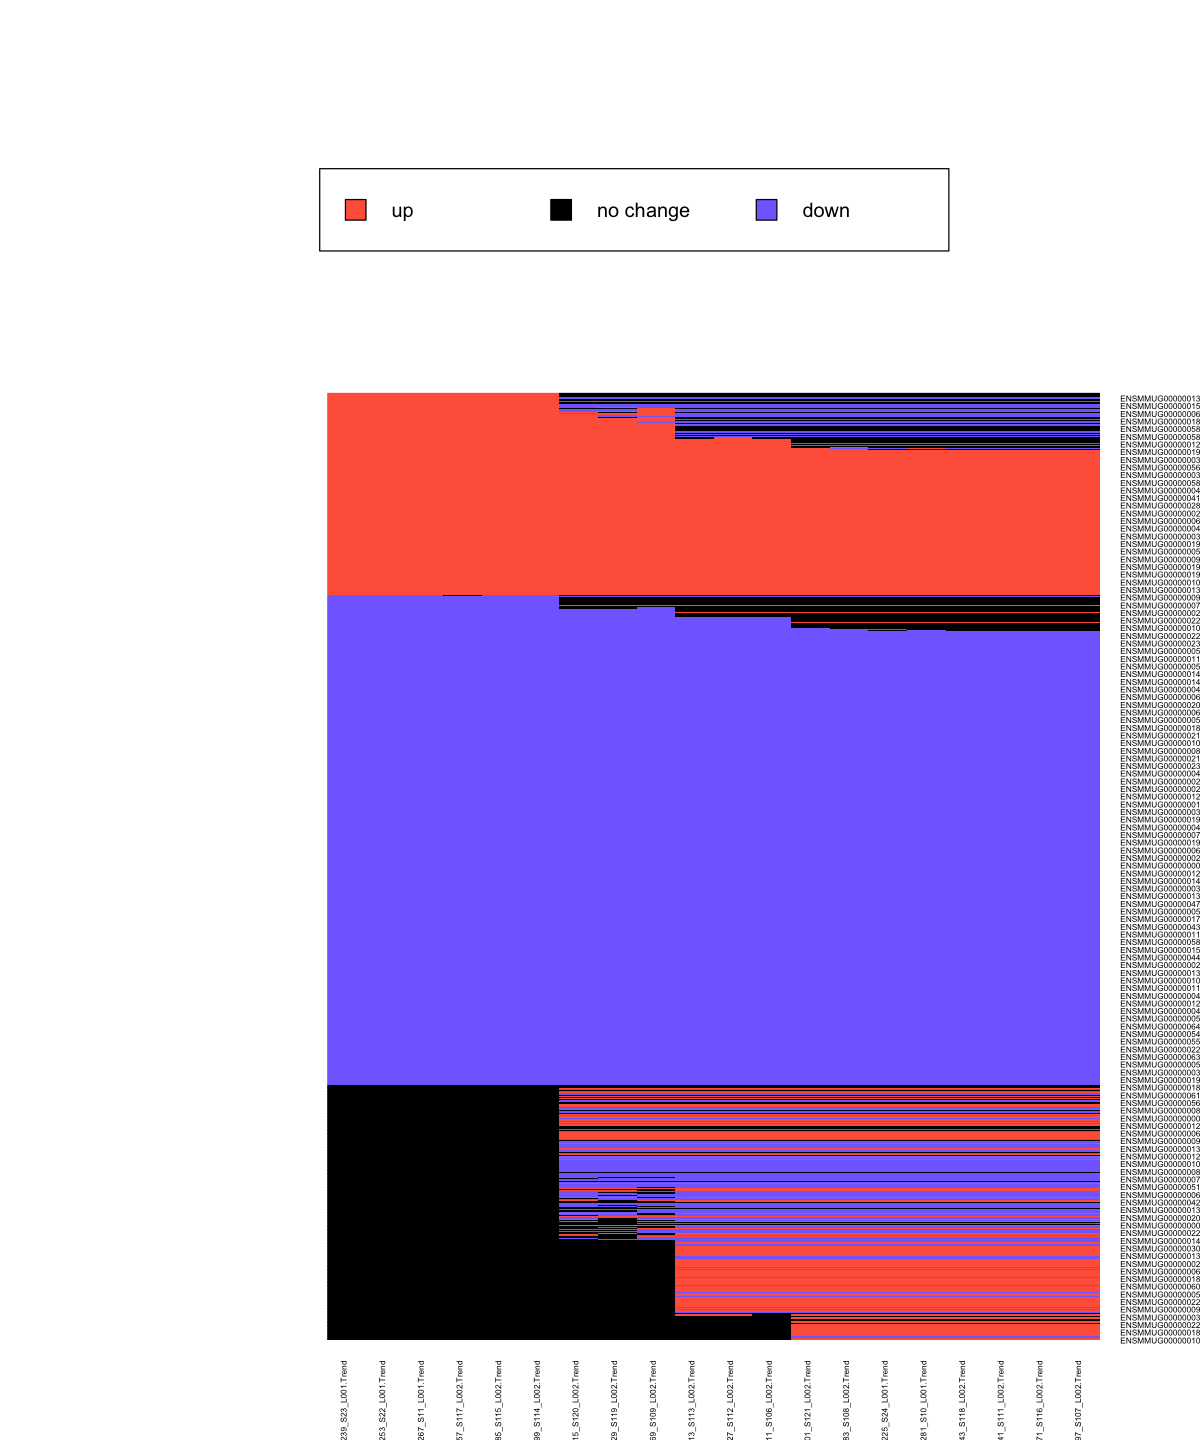

In [624]:
res2 <- results(res)
res.top <- topTrendy(res2)
res.trend <- trendHeatmap(res.top)

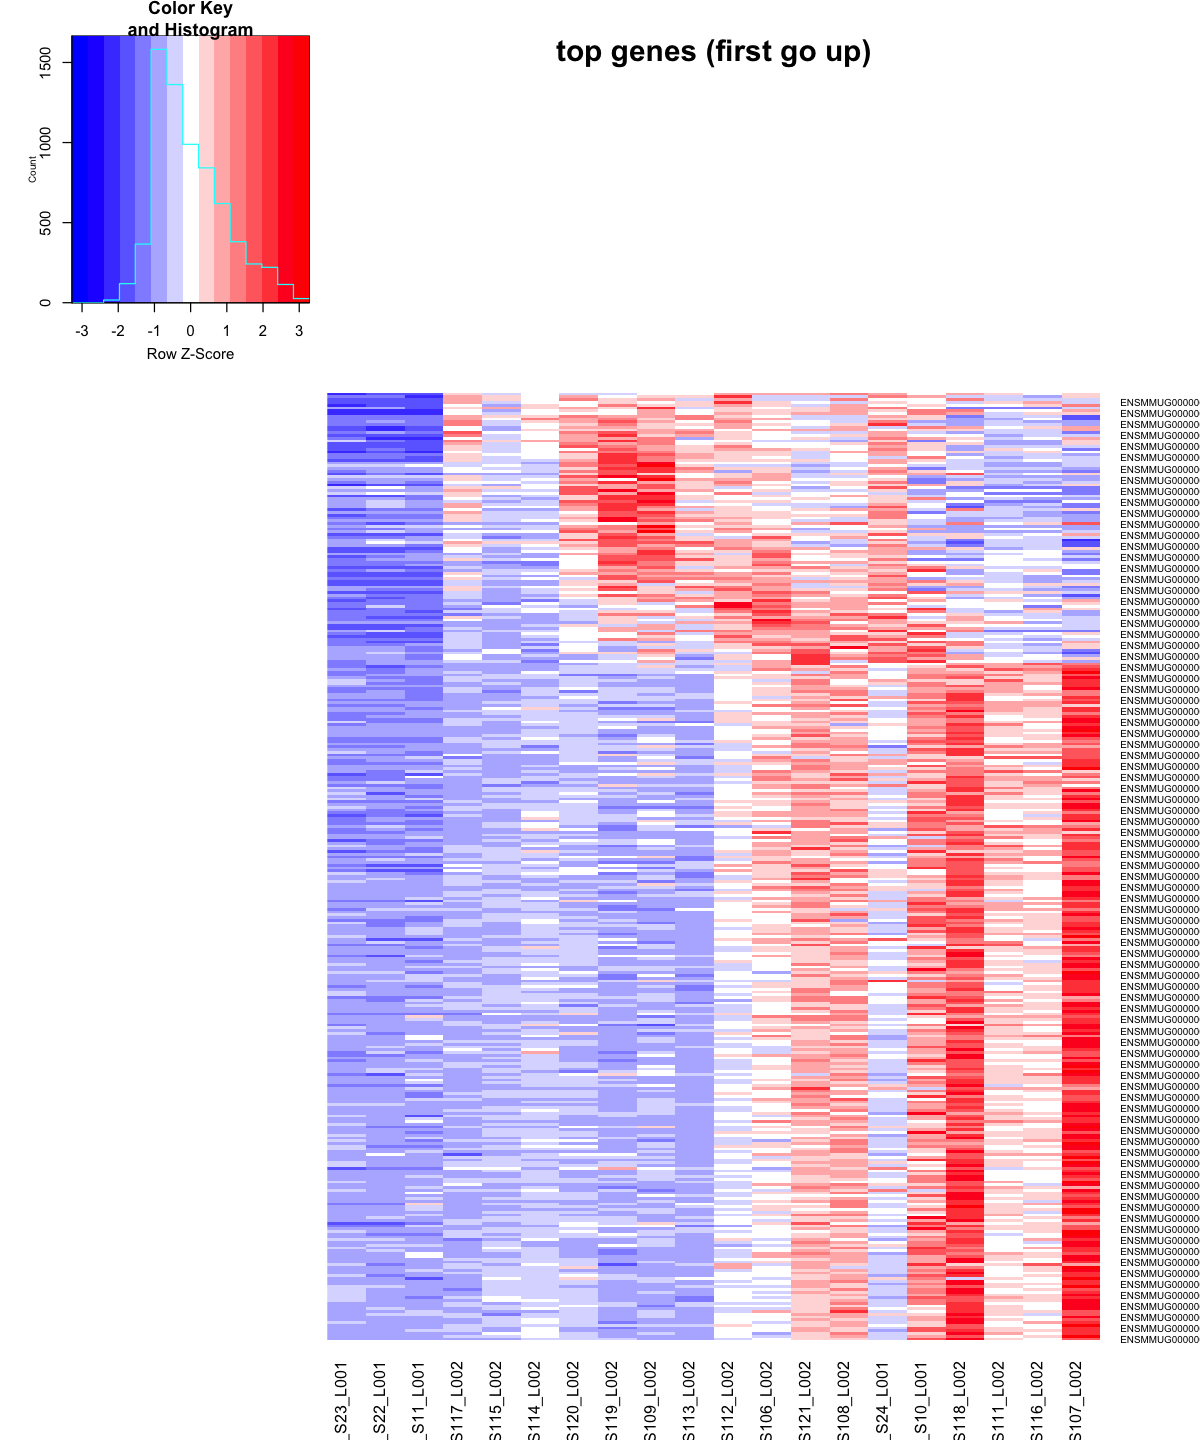

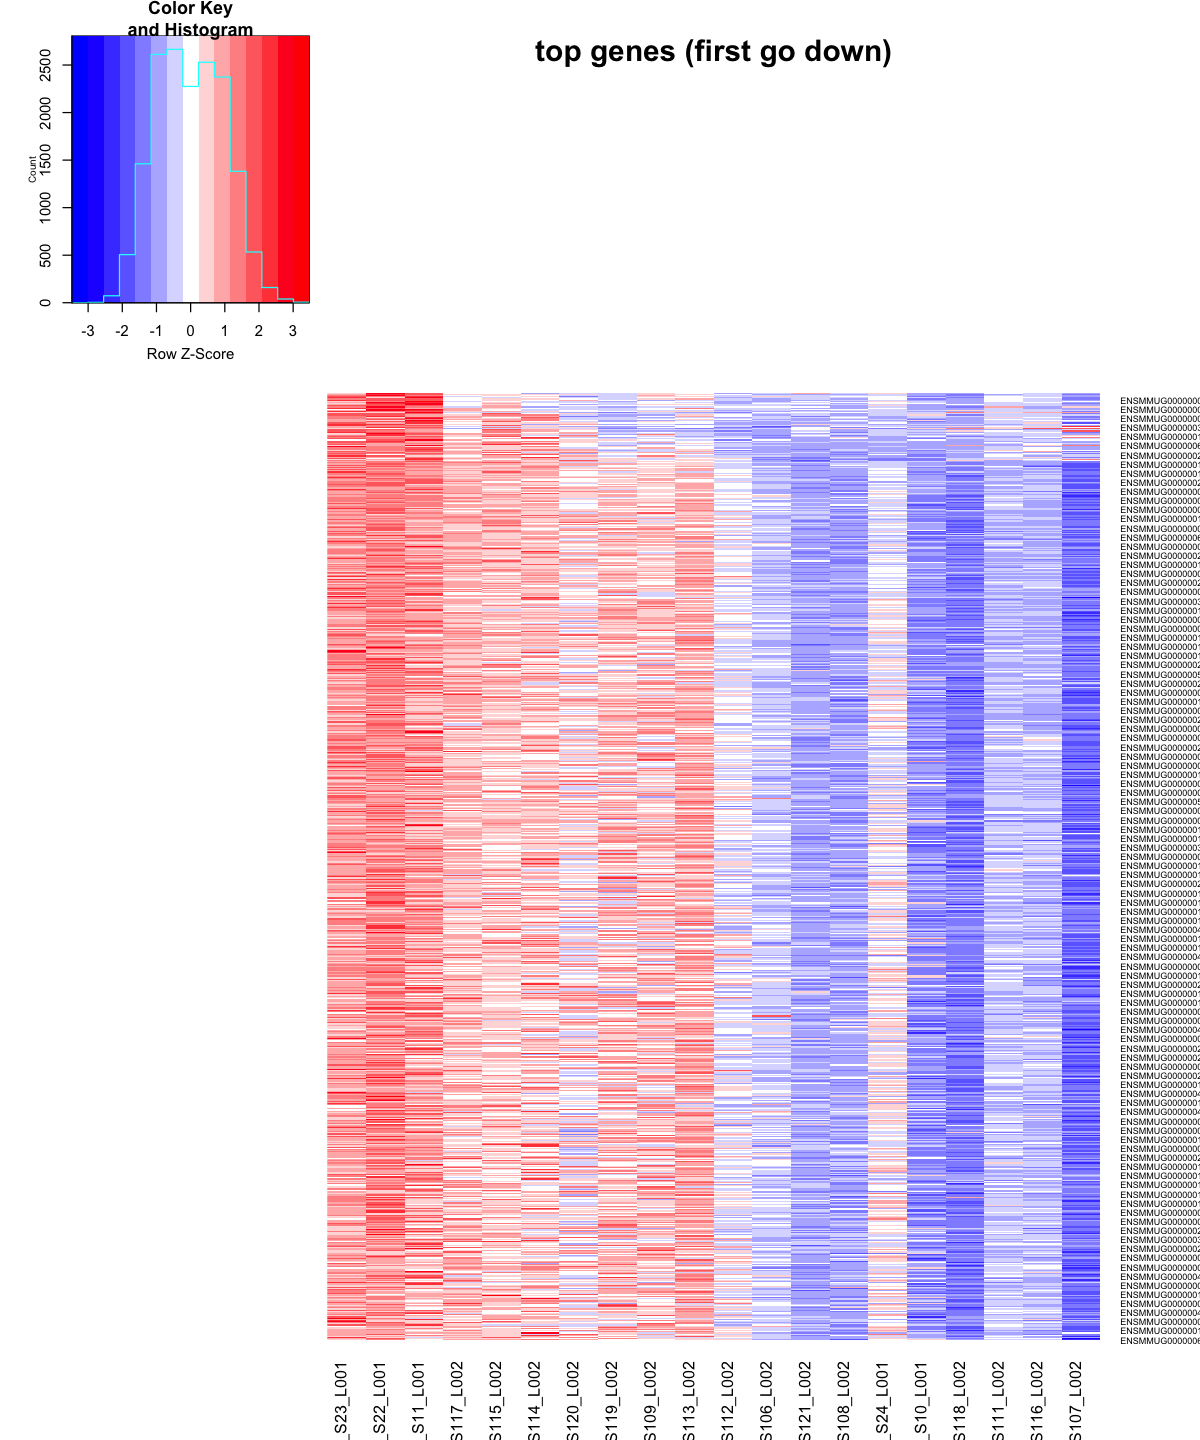

ERROR: Error in P1 + P2: non-numeric argument to binary operator


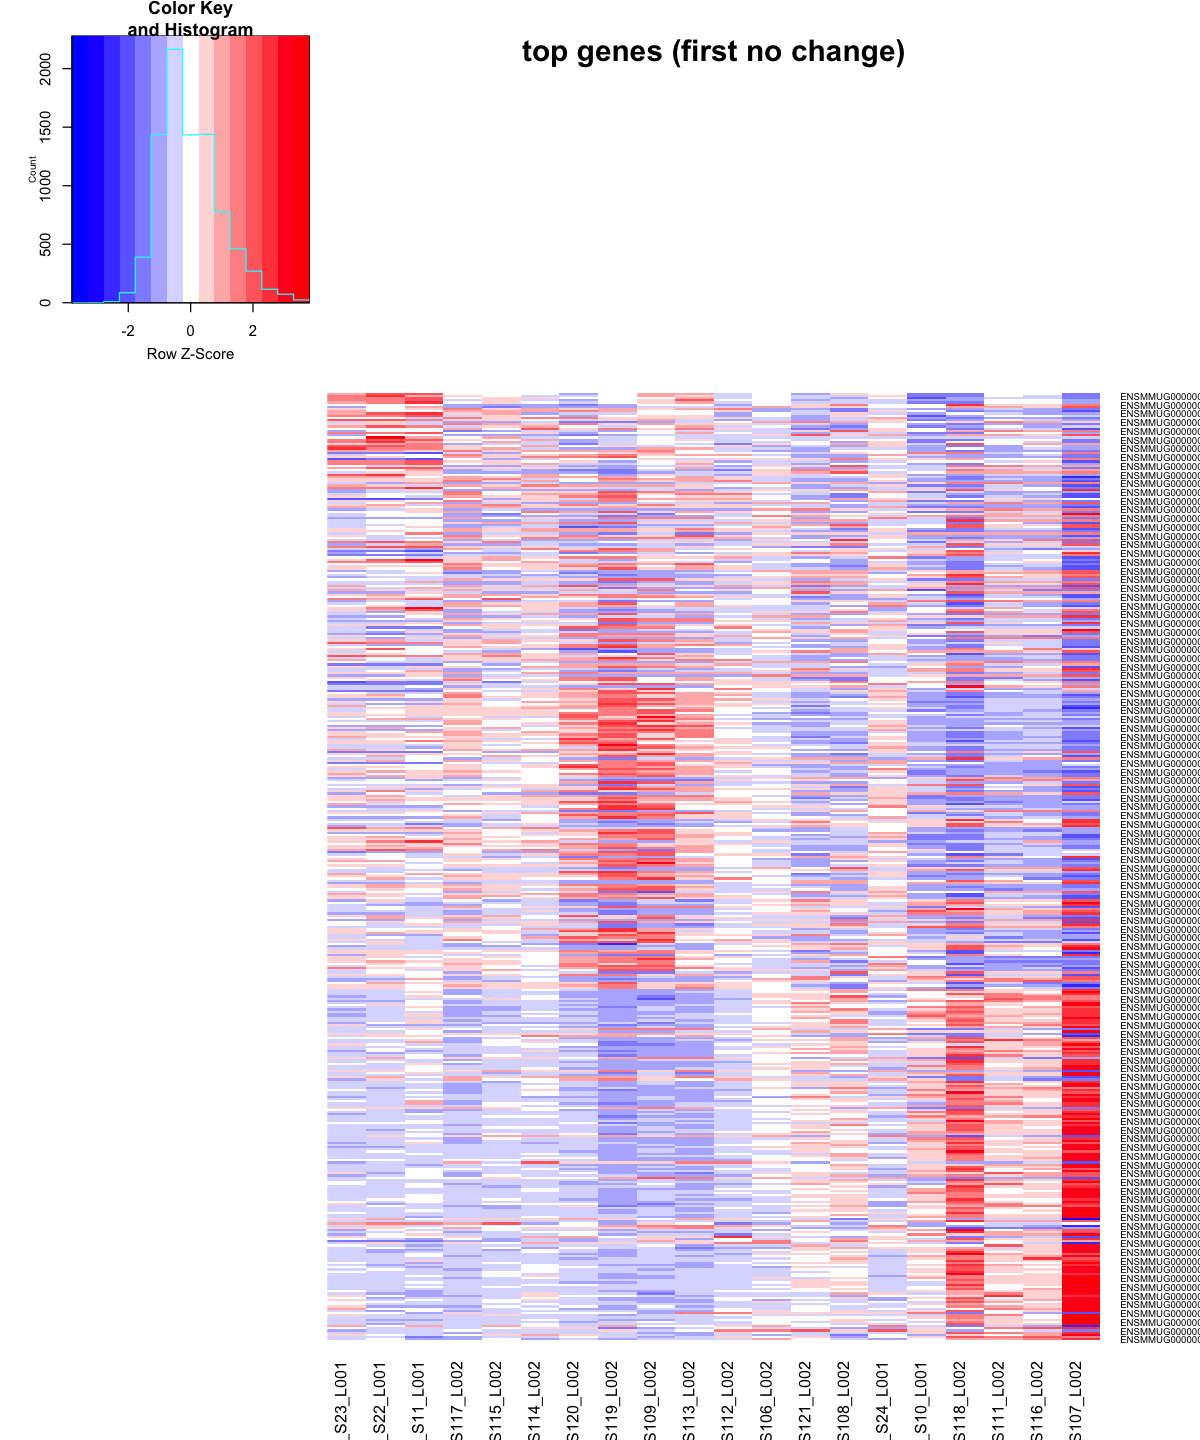

In [689]:
library(gplots)
library(patchwork)
library(ggplotify)
P1<-heatmap.2(Data[names(res.trend$firstup),],
trace="none", Rowv=FALSE,Colv=FALSE,dendrogram='none',
scale="row", main="top genes (first go up)",col=bluered)
P2<-heatmap.2(Data[names(res.trend$firstdown),],
trace="none", Rowv=FALSE,Colv=FALSE,dendrogram='none',
scale="row", main="top genes (first go down)",col=bluered)    
P3<-heatmap.2(Data[names(res.trend$firstnochange),],
trace="none", Rowv=FALSE,Colv=FALSE,dendrogram='none',
scale="row", main="top genes (first no change)",col=bluered) 
P1+P2+P3

,Most_Likely_Path,Max_PP
ENSMMUG00000038331.2,Down-Down-Down-Down-Down-Up,1
ENSMMUG00000045991.2,Down-Down-Down-Down-Down-Up,1
ENSMMUG00000043966.2,Down-Down-Down-Down-Down-Up,1
ENSMMUG00000038182.2,Down-Down-Down-Down-Down-Up,1
ENSMMUG00000045017.2,Down-Down-Down-Down-Down-Up,0.9999
ENSMMUG00000049104.2,Down-Down-Down-Down-Down-Up,0.9998


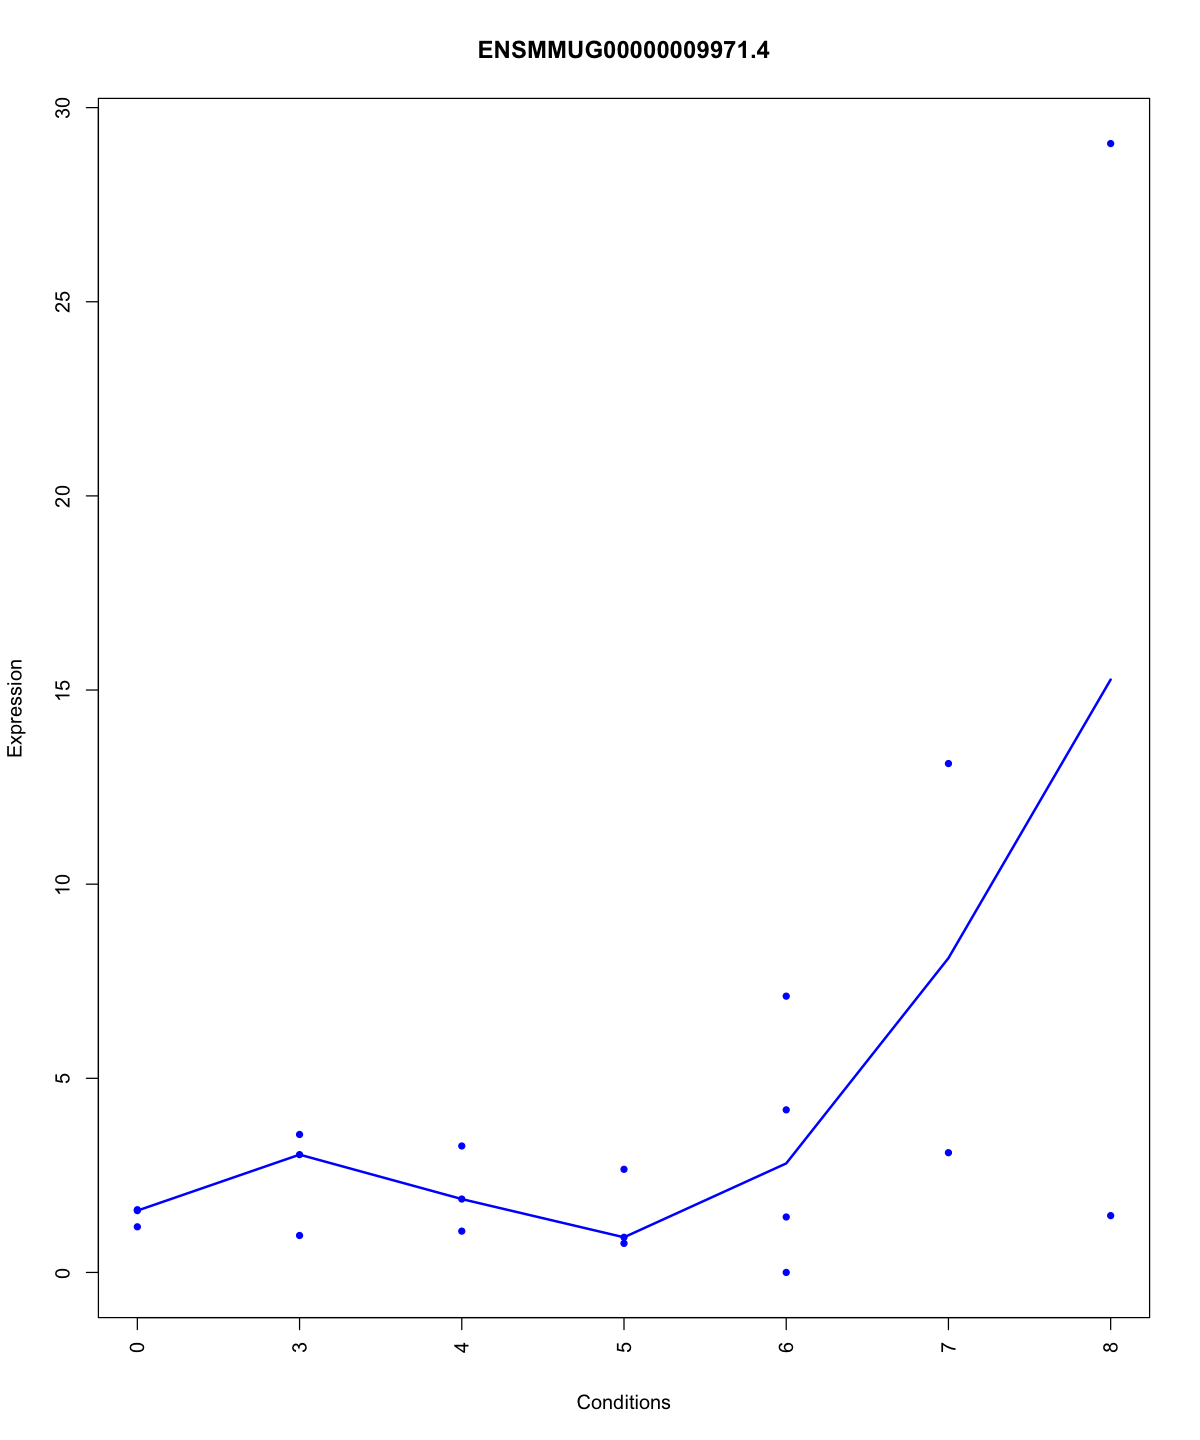

In [590]:
head(GeneDECalls)


In [699]:
table(dds.qc.experimental.alltp$full.tissue,dds.qc.experimental.alltp$dpi_time_factor)

                     
                      <0  0  3  4  5  6  7  8
  Adrenal Gland        0  3  1  2  0  1  2  1
  Brain:Brain-Gr       0  3  3  3  3  5  2  2
  Brain:Brain-Wh       0  1  1  1  3  1  1  1
  Kidney               0  3  3  2  3  5  2  2
  Liver                0  0  1  3  3  5  0  2
  Lung                 0  0  1  2  3  1  0  0
  Lymph node:LN-AX-R   0  3  3  3  3  5  2  2
  Lymph node:LN-ING-L  0  3  3  3  3  5  2  2
  Lymph node:LN-MES    0  3  2  2  3  5  2  2
  Lymph node:NA        0  0  0  0  0  0  0  0
  PBMC                 0  0  1  1  1  3  0  0
  Sex Organ:Ovary      0  1  2  0  2  3  2  0
  Sex Organ:Sex-Organ  0  2  1  3  0  3  0  0
  Sex Organ:Testis     0  0  1  2  0  1  0  1
  Skin:Non-Rash        0  3  3  0  3  3  2  1
  Skin:Rash            0  2  3  0  2  1  2  1
  SpinalCord           0  0  0  0  0  0  0  0
  Spleen               0  3  3  3  3  4  2  2
  Whole blood         34  9  6  6  2  5  2  2